# **DATA SCIENCIE II CODERHOUSE: COMISIÓN 75690**

Alumno: **Yesid García Sierra**

# **Introducción**  

La industria alimentaria es un sector dinámico donde la clasificación precisa de productos es fundamental para la toma de decisiones estratégicas. Clasificar correctamente un producto dentro de una categoría específica (como "snacks", "bebidas", "azúcares", "grasas" o "lácteos") a partir de su perfil nutricional tiene un valor significativo para diversas aplicaciones, incluyendo la segmentación de mercado, el análisis competitivo y el desarrollo de nuevas líneas de productos que respondan a las tendencias de salud y consumo.

Este análisis se enfoca en abordar este desafío al proponer la predicción de la categoría de un producto alimenticio utilizando **únicamente sus valores nutricionales**. Este enfoque nos permitirá identificar perfiles nutricionales típicos asociados a cada segmento del mercado y evaluar las oportunidades comerciales existentes. Para ello, trabajaremos con variables predictoras clave como:

*   **Energía (nutriments.energy_100g)**
*   **Grasas (nutriments.fat_100g)**
*   **Azúcares (nutriments.sugars_100g)**
*   **Sal (nutriments.salt_100g)**
*   **Proteínas (nutriments.proteins_100g)**
* **Contenidos en excesos de grasas y azucares (Pendientes por determinar)**

Clasificar correctamente un producto dentro de una categoría (como “snacks”, “bebidas”, "azucares", "grasas" o “lácteos”) a partir de su perfil nutricional tiene valor para segmentación de mercado, benchmarking competitivo y desarrollo de nuevas líneas. Este análisis propone predecir la categoría de un producto alimenticio utilizando únicamente sus valores nutricionales, lo que permite identificar perfiles nutricionales típicos por segmento y evaluar oportunidades comerciales.

#**Objetivos**

Clasificar automáticamente productos alimenticios en categorías (como snacks, bebidas, postres, yogures, etc.) en base a su perfil nutricional, para detectar patrones de consumo, comparar categorías entre sí y facilitar la segmentación del mercado alimentario.

Los objetivos específicos deben ser pasos medibles y concretos que te lleven a cumplir el objetivo general y a responder tus preguntas e hipótesis. Aquí te propongo algunos, vinculándolos a tus preguntas e hipótesis:

**1.** Identificar los perfiles nutricionales característicos de cada categoría de producto. ¿Qué nutrientes definen a cada tipo de producto (snack, bebida, yogur, etc.)?. Las categorías presentan perfiles nutricionales distintos y predecibles. Esto se logrará analizando las medidas de tendencia central y la distribución de los nutrientes ('nutriments.energy_100g', 'nutriments.fat_100g', etc.) agrupados por categorías.

**2.** Desarrollar y evaluar un modelo de clasificación automática que prediga la categoría de un producto utilizando únicamente sus valores nutricionales: ¿Se puede predecir la categoría con un modelo automático usando solo los nutrientes?. Los productos pueden ser correctamente clasificados en categorías usando su perfil nutricional.Esto implicará seleccionar características (los nutrientes), elegir un algoritmo de clasificación (como los que se pueden usar en sklearn), entrenar el modelo y evaluar su precisión.

**3.** Comparar los perfiles nutricionales entre diferentes categorías de productos para identificar cuáles presentan un mejor o peor perfil nutricional general: ¿Qué categorías tienen mejor o peor perfil nutricional?, Las bebidas tienen menor contenido de proteínas y grasas que los snacks o postres. Esto se puede hacer con visualizaciones comparativas (histogramas, box plots) de los nutrientes entre las diferentes categorías, y quizás calculando puntuaciones nutricionales compuestas si es relevante.

**4.** Analizar la concentración de azúcares y grasas en las distintas categorías para determinar qué tipos de productos tienden a contener mayores cantidades de estos nutrientes:  ¿Qué tipo de productos tiende a concentrar más azúcares o grasas?

**Variables predictoras**
*	energia
* grasas
* azucares
* sal
* fibras
* proteinas


# **Fuente de Datos**

Los datos utilizados en este análisis provienen de la API pública de **Open Food Facts**, una base de datos colaborativa que contiene información detallada sobre más de un millón de productos alimenticios de todo el mundo. A partir de esta API se extrajeron variables como:
* categories_tags: etiquetas del tipo de producto
* Nutrientes por 100g: energía, grasas, azúcares, proteínas, sal, fibra
* Marca (para análisis secundarios)

**Fuente de datos:** https://world.openfoodfacts.org/cgi/search.pl?action=process&json=true&page_size=100

**Contenido descriptivo de la API:** https://world.openfoodfacts.org/cgi/search.pl?search_terms=api&search_simple=1&action=process

# **Preguntas de Interes**

1. ¿Qué nutrientes definen a cada tipo de producto (snack, bebida, yogur, etc.)?
2.	¿Se puede predecir la categoría con un modelo automático usando solo los nutrientes?
3.	¿Qué categorías tienen mejor o peor perfil nutricional?
4.	¿Qué tipo de productos tiende a concentrar más azúcares o grasas?
5.	¿Qué oportunidades hay para innovar en snacks o postres más saludables?
6.	¿Qué categorías podrían diversificarse en líneas “light” o “funcionales”?

#**Hipótesis**  

1.	**H1:** Los productos pueden ser correctamente clasificados en categorías usando su perfil nutricional.
2.	**H2:** Las bebidas tienen menor contenido de proteínas y grasas que los snacks o postres.
3.	**H3:** Las categorías presentan perfiles nutricionales distintos y predecibles.
4.	**H4:** Algunas marcas como Sidi Ali presentan más oportunidades de mejora nutricional azucares que otras marcas.
5.	**H5:** Los productos más saludables tienden a concentrarse en ciertas categorías específicas y tienen un Nova Group por debajo de 3.
6. **H6:** Todos los productos con Nutri Score D y E poseen alergenos.

#**Importación de Librerias**

A continuación, traeremos las librerias e instalaciones necesarias con las que trabajaremos este proyecto.

In [1]:
!pip install wordcloud

In [2]:
!pip install missingno

In [3]:
import requests
import json
import os
import time
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import warnings
from wordcloud import WordCloud
import missingno as msno
from datetime import datetime, timedelta
from wordcloud import WordCloud
from googleapiclient.discovery import build
from time import sleep
from IPython.display import HTML
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from IPython.display import display

Las librerias relacionadas con Machine learning se importaran en los diferentes pasos de la selección y desarrollo de los modelos con el fin de hacer más didactica la explicación.

#**Data Scraping y lectura del Dataset y creación del dataframe**

A continuación, los codigos explicados para este proceso:

**NOTA: Esta acción puede tardar unos minutos por lo que usaremos un volumen de datos adecuado para la extracción, si no se logra la conexión por favor reiniciar entorno de ejecución hasta lograr 1000 registros**

In [4]:
all_products = []
page_size = 200  # Número de productos por página
total_products_to_fetch = 1000  # Objetivo de productos a obtener
products_fetched = 0
page_num = 1
delay_between_requests = 2 # Retardo en segundos para evitar sobrecargar la API

print(f"Fetching data in batches of {page_size} products until {total_products_to_fetch} are collected...")

while products_fetched < total_products_to_fetch:
    # Construir la URL de la API para la página actual y el tamaño de página
    url = f'https://world.openfoodfacts.org/cgi/search.pl?action=process&json=true&page={page_num}&page_size={page_size}'
    print(f"Fetching page {page_num} with page_size={page_size}...")

    try:
        # Realizar la solicitud GET a la API
        response = requests.get(url)
        # Verificar si la solicitud fue exitosa (código de estado 2xx)
        response.raise_for_status()
        data = response.json()

        # Comprobar si la respuesta contiene datos de productos
        if data and 'products' in data:
            products = data['products']

            # Si no hay productos en la página actual, significa que hemos llegado al final de los datos disponibles
            if not products:
                print(f"No more products found on page {page_num}. Stopping.")
                break

            # Agregar los productos obtenidos a la lista general
            all_products.extend(products)
            products_fetched += len(products)
            print(f"Successfully fetched {len(products)} products from page {page_num}. Total collected: {products_fetched}")

            # Incrementar el número de página para la próxima solicitud
            page_num += 1

            # Agregar un pequeño retardo antes de la próxima solicitud para ser cortés con la API
            if products_fetched < total_products_to_fetch:
                time.sleep(delay_between_requests)

        else:
            # Si la respuesta no contiene la clave 'products', hay un problema con los datos recibidos
            print(f"Could not retrieve product data from page {page_num}. Stopping.")
            break

    except requests.exceptions.RequestException as e:
        # Manejar errores de solicitud (por ejemplo, problemas de conexión)
        print(f"Error during API request for page {page_num}: {e}. Stopping.")
        break

# Después de salir del bucle (ya sea porque se alcanzó el objetivo o no hay más productos)
if all_products:
    # Crear un DataFrame de pandas a partir de la lista de diccionarios de productos
    df = pd.json_normalize(all_products)

    # Obtener la lista de nombres de columnas
    columnas = df.columns.tolist()

    # Mostrar las columnas disponibles
    print("\nAvailable columns in the DataFrame:")
    for i, col in enumerate(columnas, 1):
        print(f"{i:03d}:{col}")

    # Mostrar las primeras 5 filas del DataFrame para inspección
    print("\nPrimeras 5 filas del DataFrame:")
    display(df.head(5))

    # Imprimir el número total de productos obtenidos
    print(f"\nTotal number of products fetched: {len(df)}")
else:
    # Si la lista all_products está vacía, no se obtuvieron datos
    print("No product data was fetched.")

Se han truncado las últimas 5000 líneas del flujo de salida.
2706:images.335.sizes.100.h
2707:images.335.sizes.100.w
2708:images.335.sizes.400.h
2709:images.335.sizes.400.w
2710:images.335.sizes.full.h
2711:images.335.sizes.full.w
2712:images.335.uploaded_t
2713:images.335.uploader
2714:images.338.sizes.100.h
2715:images.338.sizes.100.w
2716:images.338.sizes.400.h
2717:images.338.sizes.400.w
2718:images.338.sizes.full.h
2719:images.338.sizes.full.w
2720:images.338.uploaded_t
2721:images.338.uploader
2722:images.339.sizes.100.h
2723:images.339.sizes.100.w
2724:images.339.sizes.400.h
2725:images.339.sizes.400.w
2726:images.339.sizes.full.h
2727:images.339.sizes.full.w
2728:images.339.uploaded_t
2729:images.339.uploader
2730:images.340.sizes.100.h
2731:images.340.sizes.100.w
2732:images.340.sizes.400.h
2733:images.340.sizes.400.w
2734:images.340.sizes.full.h
2735:images.340.sizes.full.w
2736:images.340.uploaded_t
2737:images.340.uploader
2738:images.341.sizes.100.h
2739:images.341.sizes.1

,_id,_keywords,added_countries_tags,additives_n,additives_original_tags,additives_tags,allergens,allergens_from_ingredients,allergens_from_user,allergens_hierarchy,...,ingredients_text_en_ocr_1717426005,ingredients_text_en_ocr_1717426005_result,ingredients_text_en_ocr_1717430712,ingredients_text_en_ocr_1717430712_result,ingredients_text_fr_ocr_1546269125,ingredients_text_fr_ocr_1546269125_result,images.front_en.normalize,ingredients_text_fr_ocr_1566173640,ingredients_text_fr_ocr_1566173640_result,origins_es
0,6111035000430,"[ali, and, beverage, mineral, natural, prepara...",[],0.0,[],[],,,(en),[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6111242100992,"[cheese, cream, dairie, dairy, dessert, fermen...",[],0.0,[],[],en:milk,"en:milk, en:milk, Lait écrémé, crème",(en) en:milk,[en:milk],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6111035002175,"[ali, and, bassin, beverage, cherif, dot, gree...",[],0.0,[],[],,,(en),[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6111035000058,"[14001, 22000, 45001, 9001, ali, and, beverage...",[],0.0,[],[],,,(en),[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6111252421568,"[boisson, de, eaux, et, maroc, minérale, pepsi...",[],0.0,[],[],,,(fr),[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Total number of products fetched: 1000


In [5]:
# 4. Definir las columnas ideales para análisis y ML
columnas_analisis_ml = [
    # Identidad comercial
    'product_name',
    'id',
    'brands',
    'categories',
    'categories_tags',
    'food_groups',
    'packaging',
    'countries',

    # Etiquetas y scores
    'nutriscore_grade',
    'nova_group',
    'ecoscore_grade',

    # Nutrición
    'nutriments.energy_100g',
    'nutriments.fat_100g',
    'nutriments.saturated-fat_100g',
    'nutriments.sugars_100g',
    'nutriments.proteins_100g',
    'nutriments.salt_100g',

    # Otros
    'ingredients_text',
    'creator',
    'allergens'

]

# Ensure df is created before trying to access it
if df is not None and isinstance(df, pd.DataFrame):
    # 5. Crear el DataFrame final con las columnas seleccionadas
    # Usamos .reindex(columns=columnas_analisis_ml) para asegurarnos de que el orden sea el deseado
    # y manejar casos donde alguna columna no exista en el DataFrame original (aunque en este caso sí deberían existir)
    df_final = df[columnas_analisis_ml]

    # 6. Mostrar primeras filas
    pd.set_option('display.max_columns', None)
    print("Primeras 10 filas del DataFrame con las columnas seleccionadas:")
    display(df_final.head(5))

    # Opcional: Mostrar la información del DataFrame (número de filas, columnas y tipos de datos)
    # print("\nInformación del DataFrame:")
    # df_final.info()

    # Opcional: Mostrar las columnas finales para verificar
    # print("\nColumnas finales del DataFrame:")
    # print(df_final.columns.tolist())
else:
    print("df DataFrame was not created successfully. Cannot proceed with column selection.")

Primeras 10 filas del DataFrame con las columnas seleccionadas:


,product_name,id,brands,categories,categories_tags,food_groups,packaging,countries,nutriscore_grade,nova_group,ecoscore_grade,nutriments.energy_100g,nutriments.fat_100g,nutriments.saturated-fat_100g,nutriments.sugars_100g,nutriments.proteins_100g,nutriments.salt_100g,ingredients_text,creator,allergens
0,Sidi Ali,6111035000430,Sidi Ali,"Beverages and beverages preparations,Beverages...","[en:beverages-and-beverages-preparations, en:b...",en:unsweetened-beverages,"Plastic, Bottle",Morocco,a,NaN,not-applicable,2.0,0.0,0.0,1.4,0.0,0.000000,OBD1 999 999 1112606 266963207 mb,openfoodfacts-contributors,
1,Perly,6111242100992,Jaouda,"Dairies,Fermented foods,Fermented milk product...","[en:dairies, en:fermented-foods, en:fermented-...",en:milk-and-yogurt,Plastique,"Morocco,United States",unknown,3.0,b,406.0,3.0,NaN,NaN,8.0,NaN,"Lait écrémé, crème, SUcre, ferments laciques M...",openfoodfacts-contributors,en:milk
2,Sidi Ali,6111035002175,sidi ali,"Beverages and beverages preparations,Beverages...","[en:beverages-and-beverages-preparations, en:b...",en:unsweetened-beverages,,Morocco,a,NaN,not-applicable,NaN,NaN,NaN,NaN,NaN,0.065000,Sodium 26 Calcium 12 Magnésium 9 Potassium 3 B...,openfoodfacts-contributors,
3,Eau minérale naturelle,6111035000058,"Les Eaux Minérales d'oulmès,Sidi Ali","Beverages and beverages preparations,Beverages...","[en:beverages-and-beverages-preparations, en:b...",en:unsweetened-beverages,"Plastique,Bouteille ou Flacon,Bouteille",Morocco,a,1.0,not-applicable,NaN,NaN,NaN,NaN,NaN,0.065000,eau minérale naturelle,openfoodfacts-contributors,
4,اكوافينا,6111252421568,"pepsi,PepsiCo","Boissons et préparations de boissons,Boissons,...","[en:beverages-and-beverages-preparations, en:b...",en:unsweetened-beverages,"en:Plastic, en:Bottle",المغرب,a,NaN,not-applicable,0.0,0.0,0.0,0.0,0.0,0.000508,ouverture et avant le : Voir bouteille. après ...,kiliweb,


In [6]:
print (f"Tenemos {df_final.shape} filas y columnas")

Tenemos (1000, 20) filas y columnas


Trabajaremos con estas 1000 muestras para hacer un analisis detallado.

## **Resumen de Columnas de interes**

**•	Columna product_name:** Nombre comercial del producto alimenticio tal como aparece en la etiqueta.

**•	Columna id:** Es el número de asignación unico que identifica a cada producto de la lista.

**•	Columna brands:** Marca o empresa responsable del producto. Puede incluir múltiples marcas o sub-marcas.

**•	Columna categories:** Categorías generales a las que pertenece el producto (ej: snacks, bebidas, productos lácteos).

**•	Columna categories_tags:** Etiquetas específicas de categorías jerárquicas del producto, útiles para agrupar y clasificar con mayor precisión.

**•	Columna countries_tags:** Etiquetas de los países donde el producto está presente o registrado.

**•	Columna food_groups:** Agrupación alimentaria funcional (ej: frutas, cereales, comidas preparadas, útil para generalizaciones nutricionales.

**•	Columna packaging:** Tipo de empaque del producto (ej: botella, bolsa, caja), que puede tener relación indirecta con ecoscore o logística.

**•	Columna countries:** Listado en texto plano de los países donde se distribuye el producto.

**• Columna nutriscore_grade:** Score nutricional del producto (A = mejor calidad, E = peor).

**Columna nova_group:** es un sistema de clasificación de alimentos basado en el grado de procesamiento al que han sido sometidos.**Grupo 1:** Alimentos sin procesar o mínimamente procesados.
**Grupo 2:** Ingredientes culinarios procesados.
**Grupo 3:** Alimentos procesados.
**Grupo 4:** Alimentos y bebidas ultraprocesados.

**• Columna nutriments.energy_100g:** Energía calórica del producto.

**•	Columna nutriments.fat_100g:** Cantidad de grasa total.

**•	Columna nutriments.saturated-fat_100g:** Grasa saturada (muy influyente en el Nutri-Score).

**• Columna nutriments.sugars_100g:** Azúcares simples.

**• Columna	nutriments.proteins_100g:** Proteínas.

**•	Columna nutriments.salt_100g:** Sal/sodio.

**• Columna ingredients_text:** Es el resumen del contenido de ingredientes que tiene cada articulo o producto de la lista.

**• Columna creator:** Complemento de la marca que creó dicho producto, esto es mas relacionado con la campaña o linea productiva de su lanzamiento.

**• Columna allergens:** Se refiere a los Alergenos que puede o no contener el producto y de ser positivo el tipo de alergeno o referencia a las personas que son alergicas a algún producto del cual fue derivado el producto final.

#**Data Wrangling**

##**Verificación y eliminación de Duplicados**

In [7]:
list_columns = []
for col in df_final.columns:
    if df_final[col].apply(lambda x: isinstance(x, list)).any():
        list_columns.append(col)

print(f"Columnas que contienen listas: {list_columns}")


columns_to_exclude_from_duplicates = list_columns


columns_for_duplicate_check = [col for col in df_final.columns if col not in columns_to_exclude_from_duplicates]

if not columns_for_duplicate_check:
    print("All columns contain lists or were excluded. Cannot perform duplicate check.")
else:

    duplicados = df_final.duplicated(subset=columns_for_duplicate_check)
    print(f"Hay {duplicados.sum()} filas duplicadas")

Columnas que contienen listas: ['categories_tags']
Hay 0 filas duplicadas


No existen dupilicados en este Dataframe.

##**Normalizar tipo de datos**

Simplificar sintaxis de objeto df_final

In [8]:
df=df_final

Columnas

In [9]:
df.columns

Index(['product_name', 'id', 'brands', 'categories', 'categories_tags',
       'food_groups', 'packaging', 'countries', 'nutriscore_grade',
       'nova_group', 'ecoscore_grade', 'nutriments.energy_100g',
       'nutriments.fat_100g', 'nutriments.saturated-fat_100g',
       'nutriments.sugars_100g', 'nutriments.proteins_100g',
       'nutriments.salt_100g', 'ingredients_text', 'creator', 'allergens'],
      dtype='object')

Explorar tipos de datos

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   product_name                   971 non-null    object 
 1   id                             994 non-null    object 
 2   brands                         961 non-null    object 
 3   categories                     991 non-null    object 
 4   categories_tags                991 non-null    object 
 5   food_groups                    899 non-null    object 
 6   packaging                      779 non-null    object 
 7   countries                      1000 non-null   object 
 8   nutriscore_grade               997 non-null    object 
 9   nova_group                     867 non-null    float64
 10  ecoscore_grade                 997 non-null    object 
 11  nutriments.energy_100g         940 non-null    float64
 12  nutriments.fat_100g            937 non-null    fl

 Convertir las siguientes columnas del Dataframe:
 * nova_group de float a int
 * nutriments.energy_100g as float con 3 cifras significativas
 * nutriments.fat_100g float con 3 cifras significativas
 * nutriments.saturated-fat_100g float con 3 cifras significativas
 * nutriments.sugars_100g float con 3 cifras significativas
 * nutriments.proteins_100g float con 3 cifras significativas
 * para la columna allergens llenar las celdas en blanco con not-applicable

In [11]:
df['nova_group'] = df['nova_group'].fillna(-1).astype(int)


nutrient_cols = [
    'nutriments.energy_100g',
    'nutriments.fat_100g',
    'nutriments.saturated-fat_100g',
    'nutriments.sugars_100g',
    'nutriments.proteins_100g',
]

for col in nutrient_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df[col] = df[col].round(3)


df['allergens'] = df['allergens'].replace('', np.nan)

df['allergens'] = df['allergens'].fillna('not-applicable')

/tmp/ipython-input-11-1014937105.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['nova_group'] = df['nova_group'].fillna(-1).astype(int)
/tmp/ipython-input-11-1014937105.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors='coerce')
/tmp/ipython-input-11-1014937105.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

###**Asignación de Nombres faltantes de Productos**

In [12]:
producto_sin_nombre = df.loc[73]


print("Información del producto con índice 73:")
print(producto_sin_nombre[['id', 'brands', 'categories', 'categories_tags', 'food_groups', 'ingredients_text']])

nombre_sugerido = "Pasta Seca de Trigo Knorr"

print(f"\nNombre sugerido para el producto con índice 73: {nombre_sugerido}")

df.loc[73, 'product_name'] = 'Pasta Seca de Trigo Knorr'

Información del producto con índice 73:
id                                                           20047238
brands                       Alesto,Alesto Lidl,Alesto Selection,Lidl
categories          Aliments et boissons à base de végétaux,Alimen...
categories_tags     [en:plant-based-foods-and-beverages, en:plant-...
food_groups                                                   en:nuts
ingredients_text    25% орехи, 25% лешници, 25% кашу, 25% бланшира...
Name: 73, dtype: object

Nombre sugerido para el producto con índice 73: Pasta Seca de Trigo Knorr


In [13]:
print("Información de los productos con índice 46, 52 y 55 antes de asignar nombres:")
print(df.loc[[46, 52, 55], ['id', 'brands', 'categories', 'categories_tags', 'food_groups', 'ingredients_text', 'product_name']])

# Asignar nombres de producto según la lógica de las otras columnas
df.loc[46, 'product_name'] = 'Café Soluble Descafeinado'
df.loc[52, 'product_name'] = 'Crema de Leche UHT'
df.loc[55, 'product_name'] = 'Yogur Cremoso Natural'

print("\nInformación de los productos con índice 46, 52 y 55 después de asignar nombres:")
print(df.loc[[46, 52, 55], ['id', 'brands', 'categories', 'categories_tags', 'food_groups', 'ingredients_text', 'product_name']])

df.loc[37, 'product_name'] = 'Nutella Score e'
df.loc[21, 'product_name'] = 'Nutella Score d'

Información de los productos con índice 46, 52 y 55 antes de asignar nombres:
               id           brands  \
46       80177173  Ferrero,Nutella   
52       80135463  Nutella,Ferrero   
55  8425197712024           Maruja   

                                           categories  \
46  Pequenos alomoços,Produtos para barrar,Doces p...   
52  Alimentos e bebidas à base de plantas,Alimento...   
55  Snacks,Sweet snacks,Cocoa and its products,Con...   

                                      categories_tags            food_groups  \
46  [en:breakfasts, en:spreads, en:sweet-spreads, ...              en:sweets   
52  [en:plant-based-foods-and-beverages, en:plant-...              en:sweets   
55  [en:snacks, en:sweet-snacks, en:cocoa-and-its-...  en:chocolate-products   

                                     ingredients_text product_name  
46  Sugar, palm oil, _hazelnuts_ (13%), skimmed _m...               
52  Sucre, huile de palme, _NOISETTES_ 13%, _LAIT_...               
55  sugar, c

In [14]:
# Imprimir información relevante de la fila 126 antes de asignar el nombre
print("Información del producto con índice 126 antes de asignar el nombre:")
display(df.loc[[126], ['id', 'brands', 'categories', 'categories_tags', 'food_groups', 'ingredients_text', 'product_name']])

# Basado en la información (debes ejecutar el código anterior para verla), asigna un nombre
# Por ejemplo, si la marca es "X", la categoría es "Yogures", y los ingredientes son "Leche, fermentos", podrías asignarle "Yogur Natural Marca X".
# Reemplaza 'Nombre Sugerido Aquí' con el nombre que determines.
nombre_sugerido = 'Gofres Rellenos de Chocolate' # Reemplaza con el nombre adecuado basado en tu análisis

print(f"\nNombre sugerido para el producto con índice 126: {nombre_sugerido}")

# Asignar el nombre sugerido a la fila 126
df.loc[126, 'product_name'] = nombre_sugerido

# Imprimir información de la fila 126 después de asignar el nombre para verificar
print("\nInformación del producto con índice 126 después de asignar el nombre:")
display(df.loc[[126], ['id', 'brands', 'categories', 'categories_tags', 'food_groups', 'ingredients_text', 'product_name']])

Información del producto con índice 126 antes de asignar el nombre:


,id,brands,categories,categories_tags,food_groups,ingredients_text,product_name
126,6111180000392,Idéal,"Sweeteners,Sugars,Vanillin sugars","[en:sweeteners, en:sugars, en:vanillin-sugars]",en:sweets,"sucre, amidon de maïs, éthylvanilline",



Nombre sugerido para el producto con índice 126: Gofres Rellenos de Chocolate

Información del producto con índice 126 después de asignar el nombre:


,id,brands,categories,categories_tags,food_groups,ingredients_text,product_name
126,6111180000392,Idéal,"Sweeteners,Sugars,Vanillin sugars","[en:sweeteners, en:sugars, en:vanillin-sugars]",en:sweets,"sucre, amidon de maïs, éthylvanilline",Gofres Rellenos de Chocolate


Realizamos la nueva verificación de datos

In [15]:
display(df.head(3))

df.info()

,product_name,id,brands,categories,categories_tags,food_groups,packaging,countries,nutriscore_grade,nova_group,ecoscore_grade,nutriments.energy_100g,nutriments.fat_100g,nutriments.saturated-fat_100g,nutriments.sugars_100g,nutriments.proteins_100g,nutriments.salt_100g,ingredients_text,creator,allergens
0,Sidi Ali,6111035000430,Sidi Ali,"Beverages and beverages preparations,Beverages...","[en:beverages-and-beverages-preparations, en:b...",en:unsweetened-beverages,"Plastic, Bottle",Morocco,a,-1,not-applicable,2.0,0.0,0.0,1.4,0.0,0.000,OBD1 999 999 1112606 266963207 mb,openfoodfacts-contributors,not-applicable
1,Perly,6111242100992,Jaouda,"Dairies,Fermented foods,Fermented milk product...","[en:dairies, en:fermented-foods, en:fermented-...",en:milk-and-yogurt,Plastique,"Morocco,United States",unknown,3,b,406.0,3.0,NaN,NaN,8.0,NaN,"Lait écrémé, crème, SUcre, ferments laciques M...",openfoodfacts-contributors,en:milk
2,Sidi Ali,6111035002175,sidi ali,"Beverages and beverages preparations,Beverages...","[en:beverages-and-beverages-preparations, en:b...",en:unsweetened-beverages,,Morocco,a,-1,not-applicable,NaN,NaN,NaN,NaN,NaN,0.065,Sodium 26 Calcium 12 Magnésium 9 Potassium 3 B...,openfoodfacts-contributors,not-applicable


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   product_name                   971 non-null    object 
 1   id                             994 non-null    object 
 2   brands                         961 non-null    object 
 3   categories                     991 non-null    object 
 4   categories_tags                991 non-null    object 
 5   food_groups                    899 non-null    object 
 6   packaging                      779 non-null    object 
 7   countries                      1000 non-null   object 
 8   nutriscore_grade               997 non-null    object 
 9   nova_group                     1000 non-null   int64  
 10  ecoscore_grade                 997 non-null    object 
 11  nutriments.energy_100g         940 non-null    float64
 12  nutriments.fat_100g            937 non-null    fl

##**Identificación y limpieza de datos Nulos**

Procedemos a verificar datos nulos

In [16]:
df.isnull().sum()

,0
product_name,29
id,6
brands,39
categories,9
categories_tags,9
food_groups,101
packaging,221
countries,0
nutriscore_grade,3
nova_group,0


Tenemos Datos nulos en las siguientes columnas:

* product_name
* id
* Brands
* Categories
* Categories_tags
* food_groups
* packaging
* nutriscore_grade
* escore_grade
* nutriments.energy_100g
* nutriments.fat_100g
* nutriments.saturated-fat_100g
* nutriments.sugars_100g
* nutriments.proteins_100g
* nutriments.salt_100g
* ingredients_text

Procedemos a imputar o reemplazar estos datos nulos

In [17]:
print("Filas con datos nulos:")
display(df[df[['product_name','id','brands','categories','food_groups','packaging','nutriscore_grade',
               'ecoscore_grade','nutriments.energy_100g','nutriments.fat_100g',
               'nutriments.saturated-fat_100g','nutriments.sugars_100g',
               'nutriments.proteins_100g','nutriments.salt_100g']].isnull()])

Filas con datos nulos:


,product_name,id,brands,categories,categories_tags,food_groups,packaging,countries,nutriscore_grade,nova_group,ecoscore_grade,nutriments.energy_100g,nutriments.fat_100g,nutriments.saturated-fat_100g,nutriments.sugars_100g,nutriments.proteins_100g,nutriments.salt_100g,ingredients_text,creator,allergens
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* **Columna product_name:** Cambiamos el dato dato nulo por "medicinal drink from Morocco"
* **Columna id:** Estos son registros obsoletos por lo que procedemos a eliminarlos.
* **Columna brands:** Estos son registros obsoletos por lo que procedemos a eliminarlos.
* **Columna categories:** Estos son registros obsoletos por lo que procedemos a eliminarlos.
* **Columna categories_tags:** Estos son registros obsoletos por lo que procedemos a eliminarlos.
* **Columna food_groups:** Estos son registros obsoletos por lo que procedemos a eliminarlos.
* **Columna packaging:** Estos son registros obsoletos por lo que procedemos a eliminarlos.
* **Columna nutriscore_grade:** Estos son registros obsoletos por lo que procedemos a eliminarlos.
* **Columna ecoscore_grade:** Estos son registros obsoletos por lo que procedemos a eliminarlos.
* **Columnas nutriments.energy_100g, nutriments.fat_100g, nutriments.saturated-fat_100g, nutriments.sugars_100g, nutriments.proteins_100g y nutriments.salt_100g** : Estas columnas las vamos a llenar con un (0) dado que la información que dan es que no tienen ese contenido.
* **Columna ingredients_text:** Estos son registros obsoletos por lo que procedemos a eliminarlos.

In [18]:
df['product_name'] = df['product_name'].fillna('medicinal drink from Morocco')
df = df.dropna(subset=['id'])
df = df.dropna(subset=['brands'])
df = df.dropna(subset=['categories'])
df = df.dropna(subset=['categories_tags'])
df = df.dropna(subset=['food_groups'])
df = df.dropna(subset=['packaging'])
df = df.dropna(subset=['nutriscore_grade'])
df = df.dropna(subset=['ecoscore_grade'])
df = df.dropna(subset=['ingredients_text'])

nutrient_cols_to_fill = [
    'nutriments.energy_100g',
    'nutriments.fat_100g',
    'nutriments.saturated-fat_100g',
    'nutriments.sugars_100g',
    'nutriments.proteins_100g',
    'nutriments.salt_100g'
]

for col in nutrient_cols_to_fill:
    df[col] = df[col].fillna(0)

Verificar nulos nuevamente

In [19]:
df.isnull().sum()

,0
product_name,0
id,0
brands,0
categories,0
categories_tags,0
food_groups,0
packaging,0
countries,0
nutriscore_grade,0
nova_group,0


<Axes: >

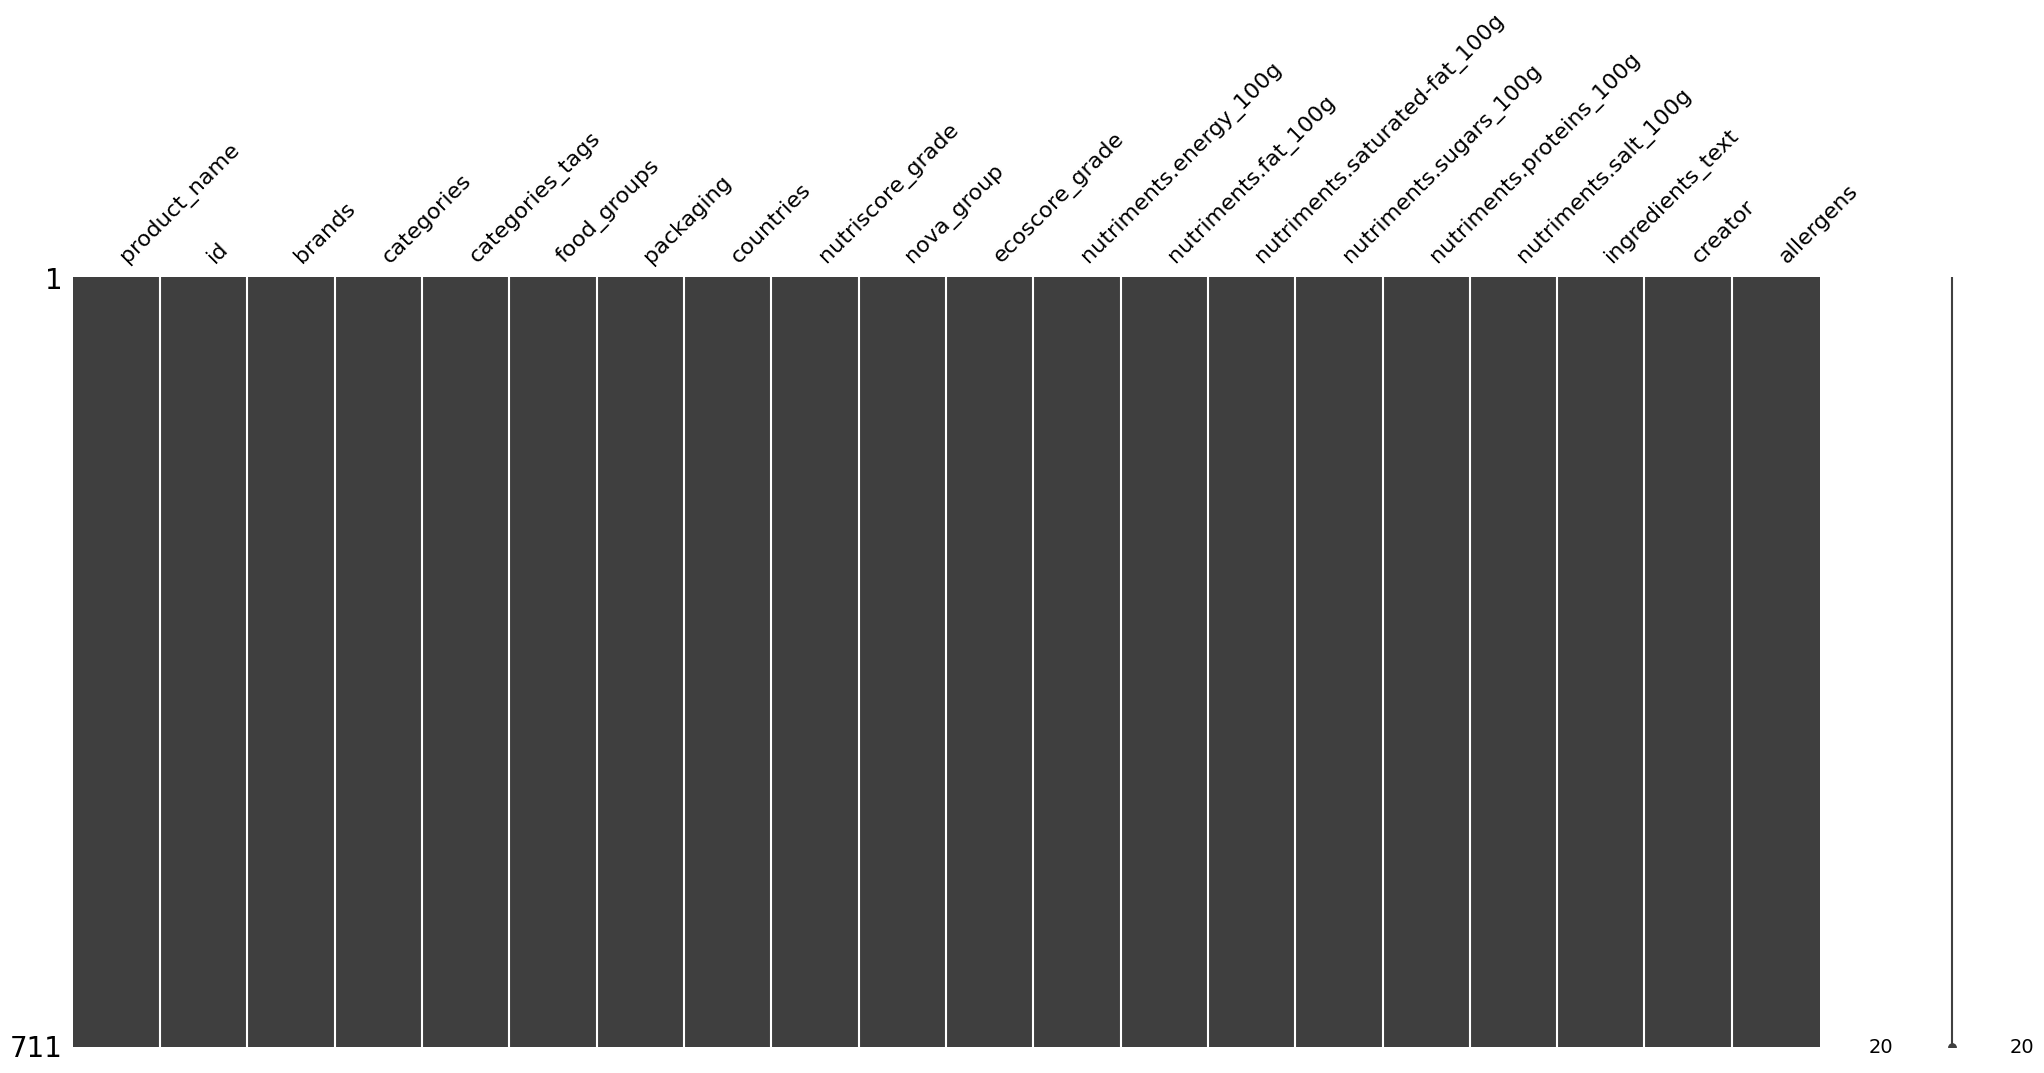

In [20]:
%matplotlib inline
msno.matrix(df)

Por tanto, el Dataframe, está libre de datos nulos.

In [21]:
print (f"Quedanos con {df.shape} filas y columnas")

Quedanos con (711, 20) filas y columnas


## **Eliminación de la columnas**

Debido a que los datos obtenidos vienen de la API y pudimos seleccionar las columnas de interes, no vamos a eliminar columnas de este dataframe debido a que la información puede categorizarse o analizarse en hipotesis o cualquier otra pregunta de interes que surja de este proyecto.

## **Creación Columnas especiales para análisis**

## **Columna excess sugar**

**Dado que este proyecto se presenta a Coderhouse en Argentina, trabajaremos con la normativa de este Pais.**

En Argentina, el tema del etiquetado frontal de advertencia (conocido como "sellos negros") está regulado principalmente por la Ley Nacional N° 27.642 de Promoción de la Alimentación Saludable, también conocida como Ley de Etiquetado Frontal.

Esta ley establece un sistema de sellos de advertencia en el frente de los envases de alimentos y bebidas no alcohólicas preenvasados, para identificar aquellos con exceso de ciertos nutrientes críticos, incluyendo los azúcares.

Umbrales para "Exceso en Azúcares" en Argentina (Ley 27.642 y su reglamentación):

La ley define los siguientes umbrales para la aplicación del sello "EXCESO EN AZÚCARES":

Para alimentos sólidos (por cada 100 gramos):
Primera etapa (inicial): ≥10% de las calorías totales provienen de azúcares (más de 10 gramos de azúcares por 100 gramos de producto).
Segunda etapa (más estricta): ≥10% de las calorías totales provienen de azúcares (más de 10 gramos de azúcares por 100 gramos de producto).
Nota: Aunque el porcentaje calórico se mantiene, la reglamentación detalla los gramos específicos. Para azúcares, el umbral es ≥10g de azúcares por cada 100g de producto.

Para bebidas (por cada 100 mililitros):
Primera etapa (inicial): ≥10% de las calorías totales provienen de azúcares (más de 5 gramos de azúcares por 100 mililitros de producto).
Segunda etapa (más estricta): ≥5% de las calorías totales provienen de azúcares (más de 5 gramos de azúcares por 100 mililitros de producto).
Nota: Similar a los sólidos, para azúcares, el umbral es ≥5g de azúcares por cada 100mL de producto.

En resumen, para que un producto en Argentina no se considere con "EXCESO EN AZÚCARES" y, por ende, no lleve el sello de advertencia por este nutriente, debería tener:

**Menos de 10 gramos de azúcares por cada 100 gramos (para sólidos).
Menos de 5 gramos de azúcares por cada 100 mililitros (para líquidos).
Norma que lo acredita:**

La normativa que lo acredita en Argentina es la Ley Nacional N° 27.642 de Promoción de la Alimentación Saludable y su correspondiente Decreto Reglamentario (Decreto N° 151/2022).

Es importante siempre consultar la última versión oficial de esta ley y su reglamentación, ya que las etapas de implementación pueden implicar ajustes en los umbrales o en la aplicación de la norma.

Analizamos tipos de empaques que tenemos:

In [22]:
pd.set_option('display.max_rows', None)

df_grouped_by_packaging = df.groupby('packaging').size().reset_index(name='count')

print("Grupos de Empaques:")

display(df_grouped_by_packaging)

pd.reset_option('display.max_rows')

Grupos de Empaques:


,packaging,count
0,,73
1,"04 LDPE, Ldpe-bag",1
2,"1 1L composite carton to recycle,1 cap to recycle",1
3,1 Bolsa de plástico para reciclar,1
4,"1 Boîte en carton,1 Sachet plastique",1
5,1 Cubo de plástico para reciclar,1
6,1 Sachet en papier à recycler,1
7,"1 bouchon à recycler, 1 Bouteille en plastique...",1
8,"1 bouteille en plastique à recycler, 1 bouchon...",1
9,"1 boîte en Carton à recycler, 2 Sachets en pla...",1


Haremos una clasificación estimada de empaques:

In [23]:
packaging_classification = {
    'Bottle': 'Líquido',
    'Plastic bottle': 'Líquido',
    'Can': 'Líquido',
    'Carton': 'Líquido',
    'Glass bottle': 'Líquido',
    'plastic-bottle': 'Líquido',
    'Canette': 'Líquido',
    'Plastic jar': 'Sólido',
    'Jar': 'Sólido',
    'Bag': 'Sólido',
    'Box': 'Sólido',
    'Plastic film': 'Sólido',
    'Sachet': 'Sólido',
    'Packet': 'Sólido',
    'Tube': 'Sólido',
    'Tray': 'Sólido',
    'Wrapper': 'Sólido',
    'Cup': 'Líquido', # Asumiendo vasos para líquidos individuales
    'Sleeve': 'Sólido',
    'Pouch': 'Sólido',
    'Container': 'Sólido', # Contenedor general, asumiendo sólido a menos que se especifique
    'Blister pack': 'Sólido',
    'Bulk': 'Sólido',
    'Caja': 'Sólido', # Español para Box
    'Bouteille en verre': 'Líquido', # Francés para Glass bottle
    'Bouteille': 'Líquido', # Francés para Bottle
    'Boîte': 'Sólido', # Francés para Box
    'Flacon': 'Líquido', # Francés para Bottle/Flask
    'Assortiment': 'Sólido', # Surtido (usualmente artículos sólidos)
    'Pack': 'Sólido', # Paquete general, asumiendo sólido a menos que se especifique
    'Verre': 'Sólido', # Vidrio (podría ser tarro para sólidos)
    'Etui carton': 'Sólido', # Estuche de cartón
    'Film plastique': 'Sólido', # Film plástico
    'Sachet en plastique': 'Sólido', # Sobre de plástico
    'Plastique': 'Sólido', # Plástico (general, asumiendo envase sólido)
    'Fles': 'Líquido', # Holandés para Bottle
    'Doos': 'Sólido', # Holandés para Box
    'Glas': 'Sólido', # Holandés para Glass (podría ser tarro para sólidos)
    'Zak': 'Sólido', # Holandés para Bag
    'Pot': 'Sólido', # Holandés para Jar
    'Folie': 'Sólido', # Holandés para Film
    'Kunststoffflasche': 'Líquido', # Alemán para Plastic bottle
    'Flasche': 'Líquido', # Alemán para Bottle
    'Beutel': 'Sólido', # Alemán para Bag
    'Dose': 'Sólido', # Alemán para Can (también puede ser para alimentos sólidos)
    'Glasflasche': 'Líquido', # Alemán para Glass bottle
    'Schachtel': 'Sólido', # Alemán para Box
    'Tragetasche': 'Sólido', # Alemán para Bolsa de transporte
    'Kunststoffverpackung': 'Sólido', # Alemán para Embalaje de plástico
    'Papierverpackung': 'Sólido', # Alemán para Embalaje de papel
    'Metalldose': 'Sólido', # Alemán para Lata de metal (también puede ser para alimentos sólidos)
    'Kunststoffschale': 'Sólido', # Alemán para Bandeja de plástico
    'Boîte en métal': 'Sólido', # Francés para Caja de metal
    'Barquette plastique': 'Sólido', # Francés para Bandeja de plástico
    'Brique': 'Líquido', # Francés para Brick (usualmente para líquidos como leche)
    'Sachet plastique': 'Sólido', # Francés para Sobre de plástico
    'Emballage plastique': 'Sólido', # Francés para Embalaje de plástico
    'Emballage carton': 'Sólido', # Francés para Embalaje de cartón
    'Emballage métal': 'Sólido', # Francés para Embalaje de metal
    'Emballage papier': 'Sólido', # Francés para Embalaje de papel
    'Enveloppe en plastique': 'Sólido', # Francés para Envoltura de plástico
    'Film alimentaire': 'Sólido', # Francés para Film alimentario
    'Barattolo di vetro': 'Sólido', # Italiano para Tarro de vidrio
    'Bottiglia di plastica': 'Líquido', # Italiano para Botella de plástico
    'Bottiglia di vetro': 'Líquido', # Italiano para Botella de vidrio
    'Scatola': 'Sólido', # Italiano para Caja
    'Sacchetto di plastica': 'Sólido', # Italiano para Bolsa de plástico
    'Vasetto': 'Sólido', # Italiano para Tarro pequeño
    'Confezione di plastica': 'Sólido', # Italiano para Envase de plástico
    'Confezione di carta': 'Sólido', # Italiano para Envase de papel
    'Confezione di metallo': 'Sólido', # Italiano para Envase de metal
    'Latta': 'Sólido', # Italiano para Lata (también puede ser para alimentos sólidos)
    'Tubetto': 'Sólido', # Italiano para Tubo
    'Busta': 'Sólido', # Italiano para Bolsa/Sobre
    'Vaschetta di plastica': 'Sólido', # Italiano para Bandeja de plástico
    'Carta': 'Sólido', # Italiano para Papel
    'Plastica': 'Sólido', # Italiano para Plástico
    'Vetro': 'Sólido', # Italiano para Vidrio
    'Metallo': 'Sólido', # Italiano para Metallo
    'Cartone': 'Sólido', # Italiano para Cartone
    'Sachet refermable': 'Sólido', # Bolsa resellable
    'Plastic tub': 'Sólido', # Tina de plástico
    'Plastic wrap': 'Sólido', # Envoltura de plástico
    'Carton box': 'Sólido', # Caja de cartón
    'Plastic bag': 'Sólido', # Bolsa de plástico
    'Glass jar': 'Sólido', # Tarro de vidrio
    'Plastic bottle': 'Líquido', # Botella de plástico
    'Aluminum can': 'Líquido', # Lata de aluminio
    'Tetra Pak': 'Líquido',
    ' doy-bag': 'Sólido', # Bolsa Doypack
    'cardboard': 'Sólido', # Cartón
    # Incluir versiones con espacio al final si aparecen en tus datos
    'Bottle ': 'Líquido',
    'Can ': 'Líquido',
    'Glass bottle ': 'Líquido',
    'carton ': 'Líquido',
    'Can ': 'Líquido',
    'Plastic jar ': 'Sólido',
    'Bag ': 'Sólido',
    'Box ': 'Sólido',
    'plastic film ': 'Sólido',
    'Sachet ': 'Sólido',
    'Packet ': 'Sólido',
    'Tube ': 'Sólido',
    'Tray ': 'Sólido',
    'Wrapper ': 'Sólido',
    'Cup ': 'Líquido',
    'Sleeve ': 'Sólido',
    'Pouch ': 'Sólido',
    'Container ': 'Sólido',
    'Blister pack ': 'Sólido',
    'Bulk ': 'Sólido',
    'Caja ': 'Sólido',
    'Bouteille en verre ': 'Líquido',
    'Bouteille ': 'Líquido',
    'Boîte ': 'Sólido',
    'Flacon ': 'Líquido',
    'Assortiment ': 'Sólido',
    'Pack ': 'Sólido',
    'Verre ': 'Sólido',
    'Etui carton ': 'Sólido',
    'Film plastique ': 'Sólido',
    'Sachet en plastique ': 'Sólido',
    'Plastique ': 'Sólido',
    'Fles ': 'Líquido',
    'Doos ': 'Sólido',
    'Glas ': 'Sólido',
    'Zak ': 'Sólido',
    'Pot ': 'Sólido',
    'Folie ': 'Sólido',
    'Kunststoffflasche ': 'Líquido',
    'Flasche ': 'Líquido',
    'Beutel ': 'Sólido',
    'Dose ': 'Sólido',
    'Glasflasche ': 'Líquido',
    'Schachtel ': 'Sólido',
    'Tragetasche ': 'Sólido',
    'Kunststoffverpackung ': 'Sólido',
    'Papierverpackung ': 'Sólido',
    'Metalldose ': 'Sólido',
    'Kunststoffschale ': 'Sólido',
    'Boîte en métal ': 'Sólido',
    'Barquette plastique ': 'Sólido',
    'Brique ': 'Líquido',
    'Sachet plastique ': 'Sólido',
    'Emballage plastique ': 'Sólido',
    'Emballage carton ': 'Sólido',
    'Emballage métal ': 'Sólido',
    'Emballage papier ': 'Sólido',
    'Enveloppe en plastique ': 'Sólido',
    'Film alimentaire ': 'Sólido',
    'Barattolo di vetro ': 'Sólido',
    'Bottiglia di plastica ': 'Líquido',
    'Bottiglia di vetro ': 'Líquido',
    'Scatola ': 'Sólido',
    'Sacchetto di plastica ': 'Sólido',
    'Vasetto ': 'Sólido',
    'Confezione di plastica ': 'Sólido',
    'Confezione di carta ': 'Sólido',
    'Confezione di metallo ': 'Sólido',
    'Latta ': 'Sólido',
    'Tubetto ': 'Sólido',
    'Busta ': 'Sólido',
    'Vaschetta di plastica ': 'Sólido',
    'Carta ': 'Sólido',
    'Plastica ': 'Sólido',
    'Vetro ': 'Sólido',
    'Metallo ': 'Sólido',
    'Cartone ': 'Sólido',
    'Sachet refermable ': 'Sólido',
    'Plastic tub ': 'Sólido',
    'Plastic wrap ': 'Sólido',
    'Carton box ': 'Sólido',
    'Plastic bag ': 'Sólido',
    'Glass jar ': 'Sólido',
    'Plastic bottle ': 'Líquido',
    'Aluminum can ': 'Líquido',
    'Tetra Pak ': 'Líquido',
    ' doy-bag ': 'Sólido',
    'cardboard ': 'Sólido',
    'bottle': 'Líquido',
    'can': 'Líquido',
    'carton': 'Líquido',
    'glass bottle': 'Líquido',
    'plastic bottle': 'Líquido',
    'canette': 'Líquido',
    'plastic jar': 'Sólido',
    'jar': 'Sólido',
    'bag': 'Sólido',
    'box': 'Sólido',
    'plastic film': 'Sólido',
    'sachet': 'Sólido',
    'packet': 'Sólido',
    'tube': 'Sólido',
    'tray': 'Sólido',
    'wrapper': 'Sólido',
    'cup': 'Líquido',
    'sleeve': 'Sólido',
    'pouch': 'Sólido',
    'container': 'Sólido',
    'blister pack': 'Sólido',
    'bulk': 'Sólido',
    'caja': 'Sólido',
    'bouteille en verre': 'Líquido',
    'bouteille': 'Líquido',
    'boîte': 'Sólido',
    'flacon': 'Líquido',
    'assortiment': 'Sólido',
    'pack': 'Sólido',
    'verre': 'Sólido',
    'etui carton': 'Sólido',
    'film plastique': 'Sólido',
    'sachet en plastique': 'Sólido',
    'plastique': 'Sólido',
    'fles': 'Líquido',
    'doos': 'Sólido',
    'glas': 'Sólido',
    'zak': 'Sólido',
    'pot': 'Sólido',
    'folie': 'Sólido',
    'kunststoffflasche': 'Líquido',
    'flasche': 'Líquido',
    'beutel': 'Sólido',
    'dose': 'Sólido',
    'glasflasche': 'Líquido',
    'schachtel': 'Sólido',
    'tragetasche': 'Sólido',
    'kunststoffverpackung': 'Sólido',
    'papierverpackung': 'Sólido',
    'metalldose': 'Sólido',
    'kunststoffschale': 'Sólido',
    'boîte en métal': 'Sólido',
    'barquette plastique': 'Sólido',
    'brique': 'Líquido',
    'sachet plastique': 'Sólido',
    'emballage plastique': 'Sólido',
    'emballage carton': 'Sólido',
    'emballage métal': 'Sólido',
    'emballage papier': 'Sólido',
    'enveloppe en plastique': 'Sólido',
    'film alimentaire': 'Sólido',
    'barattolo di vetro': 'Sólido',
    'bottiglia di plastica': 'Líquido',
    'bottiglia di vetro': 'Líquido',
    'scatola': 'Sólido',
    'sacchetto di plastica': 'Sólido',
    'vasetto': 'Sólido',
    'confezione di plastica': 'Sólido',
    'confezione di carta': 'Sólido',
    'confezione de metallo': 'Sólido',
    'latta': 'Sólido',
    'tubetto': 'Sólido',
    'busta': 'Sólido',
    'vaschetta di plastica': 'Sólido',
    'carta': 'Sólido',
    'plastica': 'Sólido',
    'vetro': 'Sólido',
    'metallo': 'Sólido',
    'cartone': 'Sólido',
    'sachet refermable': 'Sólido',
    'plastic tub': 'Sólido',
    'plastic wrap': 'Sólido',
    'carton box': 'Sólido',
    'plastic bag': 'Sólido',
    'glass jar': 'Sólido',
    'plastic bottle': 'Líquido',
    'aluminum can': 'Líquido',
    'tetra pak': 'Líquido',
    ' doy-bag': 'Sólido',
    'cardboard': 'Sólido',
}

# Create the 'packaging_type' column based on the 'packaging' column and the classification dictionary
# We use .get(x, 'Desconocido') to assign 'Desconocido' if a packaging type is not found in the dictionary
df['packaging_type'] = df['packaging'].apply(lambda x: packaging_classification.get(x, 'Desconocido'))

# Now replace the 'Desconocido' values with 'Mixtos'
df['packaging_type'] = df['packaging_type'].replace('Desconocido', 'Mixtos')

# Mostrar el conteo actualizado de cada clasificación de tipo de envase
print("\nClasificación de Empaques (Sólido/Líquido/Mixtos):")
display(df.groupby('packaging_type').size().reset_index(name='count'))


Clasificación de Empaques (Sólido/Líquido/Mixtos):


,packaging_type,count
0,Líquido,10
1,Mixtos,667
2,Sólido,34


**Se habla de empaques Mixtos aquellos en donde puede haber contenido de solido o de liquido y decidimos crear esta categoria de empaque para facilidad del analisis.**

Usaremoa la siguiente regla

**si packaging_type es Liquido el valor de limite de azucares es 5.000, si packaging_type es solido, el valor es de 10.000 y si es mixto usaremos un valor promedio entre 5.000 y 10.000**

In [24]:
df['excess_sugar'] = df.apply(lambda row: row['nutriments.sugars_100g'] > (5.000 if row['packaging_type'] == 'Líquido' else (10.000 if row['packaging_type'] == 'Sólido' else 7.500)), axis=1)

In [25]:
df_grouped_by_excess_sugar = df.groupby('excess_sugar').size().reset_index(name='count')
print("Exceso de azucares en productos:")
display(df_grouped_by_excess_sugar)

Exceso de azucares en productos:


,excess_sugar,count
0,False,453
1,True,258


Para este dataset existen 259 productos que se consideran con excesos de azucares segun la normativa. Esta información será importante para las predicciones de este proyecto.

## **Columnas excess saturated fats**

En Argentina, la normativa que regula el exceso de grasas saturadas y, por lo tanto, la aplicación de sellos de advertencia en los envases de alimentos y bebidas, es la misma que mencionamos para los azúcares:

La Ley Nacional N° 27.642 de Promoción de la Alimentación Saludable, conocida como Ley de Etiquetado Frontal, y su Decreto Reglamentario N° 151/2022.

Esta ley establece un sistema de sellos de advertencia en el frente de los envases, y uno de esos sellos es "EXCESO EN GRASAS SATURADAS".

Umbrales para "Exceso en Grasas Saturadas" en Argentina (Ley 27.642 y su reglamentación):

La ley define los siguientes umbrales para la aplicación del sello "EXCESO EN GRASAS SATURADAS":

Para alimentos sólidos (por cada 100 gramos):
Primera etapa (inicial): ≥10% de las calorías totales provienen de grasas saturadas.
Segunda etapa (más estricta): ≥7% de las calorías totales provienen de grasas saturadas.
Nota: Aunque el porcentaje calórico es la base, la reglamentación también detalla los gramos específicos. Para grasas saturadas, el umbral es ≥5g de grasas saturadas por cada 100g de producto.
Para bebidas (por cada 100 mililitros):
Primera etapa (inicial): ≥5% de las calorías totales provienen de grasas saturadas.
Segunda etapa (más estricta): ≥2% de las calorías totales provienen de grasas saturadas.
Nota: Para grasas saturadas en líquidos, el umbral es ≥2g de grasas saturadas por cada 100mL de producto.
En resumen, para que un producto en Argentina no se considere con "EXCESO EN GRASAS SATURADAS" y, por ende, no lleve el sello de advertencia por este nutriente, debería tener:

**Menos de 5 gramos de grasas saturadas por cada 100 gramos (para sólidos).
Menos de 2 gramos de grasas saturadas por cada 100 mililitros (para líquidos).
Norma que lo acredita:**

La normativa que lo acredita es la Ley Nacional N° 27.642 de Promoción de la Alimentación Saludable y su correspondiente Decreto Reglamentario N° 151/2022. Es fundamental consultar siempre las versiones oficiales y actualizadas de estas normativas, ya que la implementación de las etapas puede influir en los umbrales aplicables en un momento dado.

Procedemos a calcular según esta normativa:

**si packaging_type es Liquido el valor de limite de azucares es 2.000, si packaging_type es solido, el valor es de 5.000 y si es mixto usaremos un valor promedio entre 2.000 y 5.000**

In [26]:
df['excess_saturated_fat'] = df.apply(lambda row: row['nutriments.saturated-fat_100g'] > (2.000 if row['packaging_type'] == 'Líquido' else (5.000 if row['packaging_type'] == 'Sólido' else 3.500)), axis=1)

In [27]:
df_grouped_by_excess_saturatedfat = df.groupby('excess_saturated_fat').size().reset_index(name='count')
print("Resumen de excesos de grasas en Productos:")
display(df_grouped_by_excess_saturatedfat)

Resumen de excesos de grasas en Productos:


,excess_saturated_fat,count
0,False,459
1,True,252


Encontramos que la cantidad de productos con exceso de grasas saturadas es muy similar por lo que ambas columnas pueden servir para predicciones.

Como un Plus, verificaremos en las correlaciones la relación que existe entre grasas y exceso de grasas por 100 gramos de producto.

## **Tamaño final del Dataframe**

Luego del proceso del Data Wrangling tenemos el Dataframe final

In [28]:
print (f"Tenemos {df.shape} filas y columnas")

Tenemos (711, 23) filas y columnas


In [29]:
df.head()

,product_name,id,brands,categories,categories_tags,food_groups,packaging,countries,nutriscore_grade,nova_group,ecoscore_grade,nutriments.energy_100g,nutriments.fat_100g,nutriments.saturated-fat_100g,nutriments.sugars_100g,nutriments.proteins_100g,nutriments.salt_100g,ingredients_text,creator,allergens,packaging_type,excess_sugar,excess_saturated_fat
0,Sidi Ali,6111035000430,Sidi Ali,"Beverages and beverages preparations,Beverages...","[en:beverages-and-beverages-preparations, en:b...",en:unsweetened-beverages,"Plastic, Bottle",Morocco,a,-1,not-applicable,2.0,0.0,0.0,1.4,0.0,0.000000,OBD1 999 999 1112606 266963207 mb,openfoodfacts-contributors,not-applicable,Mixtos,False,False
1,Perly,6111242100992,Jaouda,"Dairies,Fermented foods,Fermented milk product...","[en:dairies, en:fermented-foods, en:fermented-...",en:milk-and-yogurt,Plastique,"Morocco,United States",unknown,3,b,406.0,3.0,0.0,0.0,8.0,0.000000,"Lait écrémé, crème, SUcre, ferments laciques M...",openfoodfacts-contributors,en:milk,Sólido,False,False
2,Sidi Ali,6111035002175,sidi ali,"Beverages and beverages preparations,Beverages...","[en:beverages-and-beverages-preparations, en:b...",en:unsweetened-beverages,,Morocco,a,-1,not-applicable,0.0,0.0,0.0,0.0,0.0,0.065000,Sodium 26 Calcium 12 Magnésium 9 Potassium 3 B...,openfoodfacts-contributors,not-applicable,Mixtos,False,False
3,Eau minérale naturelle,6111035000058,"Les Eaux Minérales d'oulmès,Sidi Ali","Beverages and beverages preparations,Beverages...","[en:beverages-and-beverages-preparations, en:b...",en:unsweetened-beverages,"Plastique,Bouteille ou Flacon,Bouteille",Morocco,a,1,not-applicable,0.0,0.0,0.0,0.0,0.0,0.065000,eau minérale naturelle,openfoodfacts-contributors,not-applicable,Mixtos,False,False
4,اكوافينا,6111252421568,"pepsi,PepsiCo","Boissons et préparations de boissons,Boissons,...","[en:beverages-and-beverages-preparations, en:b...",en:unsweetened-beverages,"en:Plastic, en:Bottle",المغرب,a,-1,not-applicable,0.0,0.0,0.0,0.0,0.0,0.000508,ouverture et avant le : Voir bouteille. après ...,kiliweb,not-applicable,Mixtos,False,False


#**Analisis exploratorio de Datos (EDA)**

## **Medidas de tendencia central**

In [30]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
nova_group,711.0,2.967651,1.501293,-1.0,3.00,4.00,4.0000,4.0
nutriments.energy_100g,711.0,1288.394655,913.972409,0.0,338.00,1413.00,1980.0000,4650.0
nutriments.fat_100g,711.0,16.942505,21.581934,0.0,1.29,7.30,26.0000,100.0
nutriments.saturated-fat_100g,711.0,5.319985,8.609333,0.0,0.19,1.30,6.9500,57.0
nutriments.sugars_100g,711.0,11.574270,16.908808,0.0,1.00,4.20,14.8500,100.0
nutriments.proteins_100g,711.0,6.825217,6.437417,0.0,1.10,6.30,9.8000,34.0
nutriments.salt_100g,711.0,0.715528,1.589466,0.0,0.02,0.26,0.9725,18.3


## **Detección de Outliers y Distribución Normal**

In [31]:
numerical_cols = [
    'nova_group',
    'nutriments.energy_100g',
    'nutriments.fat_100g',
    'nutriments.saturated-fat_100g',
    'nutriments.sugars_100g',
    'nutriments.proteins_100g',
    'nutriments.salt_100g'
]


colors = ['blue', 'red', 'green', 'purple', 'orange', 'brown', 'pink']

for i, col in enumerate(numerical_cols):

    fig_stad_hist = px.histogram(df, x=col, marginal="box", nbins=30,
                            title=f'<b>Distribución de {col}</b>',
                            color_discrete_sequence=[colors[i % len(colors)]])
    fig_stad_hist.update_layout(title_x=0.5)
    fig_stad_hist.show()


    fig_stad_scatter = px.scatter(df, y=col, title=f'<b>Dispersión de {col}</b>',
                             color_discrete_sequence=[colors[i % len(colors)]])
    fig_stad_scatter.update_layout(title_x=0.5)
    fig_stad_scatter.show()

A continuación, unas conclusiones generales de las variables:

* **nova_group:** Hay datos de nova_group para 713 productos (count). El promedio es de aproximadamente 2.95 (mean), con una desviación estándar de cerca de 1.52 (std). Los valores van desde -1.0 (min) hasta 4.0 (max). La mitad de los productos tienen un nova_group de 4.00 o menos (50%). La mediana (4.00) y el tercer cuartil (4.00) son iguales, lo que indica que al menos el 50% de los productos se clasifican como ultraprocesados (Grupo 4). El valor mínimo de -1.0 probablemente indica datos faltantes o no clasificados.

* **nutriments.energy_100g:** Hay datos de energía para 713 productos (count). El promedio es de aproximadamente 1277.33 (mean) kJ por 100g, con una alta desviación estándar de cerca de 903.40 (std). Los valores van desde 0.0 (min) hasta 3768.0 (max). La mitad de los productos tienen 1393.00 o menos de energía por 100g (50%). La alta desviación estándar y la diferencia entre la media y la mediana sugieren una distribución sesgada, con una gran variabilidad en el contenido energético de los productos.

* **nutriments.fat_100g:** Hay datos de grasas para 713 productos (count). El promedio es de aproximadamente 16.76 (mean) por 100g, con una altísima desviación estándar de cerca de 21.34 (std). Los valores van desde 0.0 (min) hasta 100.0 (max). La mitad de los productos tienen 7.50 o menos de grasas por 100g (50%). La enorme desviación estándar y la gran diferencia entre la media y la mediana, junto con el valor máximo de 100.0, sugieren una distribución extremadamente sesgada hacia la derecha, con una cola larga de productos con alto contenido de grasa.

* **nutriments.saturated-fat_100g:** Hay datos de grasas saturadas para 713 productos (count).
El promedio es de aproximadamente 5.34 (mean) por 100g, con una alta desviación estándar de cerca de 8.64 (std). Los valores van desde 0.0 (min) hasta 57.0 (max). La mitad de los productos tienen 1.30 o menos de grasas saturadas por 100g (50%). La alta desviación estándar y la diferencia significativa entre la media y la mediana indican una distribución fuertemente sesgada hacia la derecha.

* **nutriments.sugars_100g:** Hay datos de azúcares para 713 productos (count). El promedio es de aproximadamente 11.50 (mean) por 100g, con una alta desviación estándar de cerca de 16.80 (std). Los valores van desde 0.0 (min) hasta 100.0 (max). La mitad de los productos tienen 4.20 o menos de azúcares por 100g (50%). La alta desviación estándar y la gran diferencia entre la media y la mediana, junto con el valor máximo de 100.0, sugieren una distribución muy sesgada hacia la derecha, con muchos productos bajos en azúcar y una proporción menor con contenidos muy altos.

* **nutriments.proteins_100g:** Hay datos de proteínas para 713 productos (count).
El promedio es de aproximadamente 6.84 (mean) por 100g, con una desviación estándar de cerca de 6.46 (std). Los valores van desde 0.0 (min) hasta 34.0 (max). La mitad de los productos tienen 6.30 o menos de proteínas por 100g (50%).
La desviación estándar cercana a la media y la media ligeramente superior a la mediana sugieren una distribución moderadamente sesgada hacia la derecha.

* **nutriments.salt_100g:** Hay datos de sal para 713 productos (count). El promedio es de aproximadamente 0.72 (mean) por 100g, con una altísima desviación estándar de cerca de 1.59 (std). Los valores van desde 0.0 (min) hasta 18.3 (max). La mitad de los productos tienen 0.27 o menos de sal por 100g (50%).
La desviación estándar más del doble que la media y la gran diferencia entre la media y la mediana indican una distribución muy sesgada hacia la derecha, con muchos productos bajos en sal y algunos con concentraciones muy elevadas.

##**Correlación de Datos**

In [32]:
df_corr = df.corr(numeric_only=True)
df_corr

,nova_group,nutriments.energy_100g,nutriments.fat_100g,nutriments.saturated-fat_100g,nutriments.sugars_100g,nutriments.proteins_100g,nutriments.salt_100g,excess_sugar,excess_saturated_fat
nova_group,1.000000,0.206153,0.071769,0.080634,0.176648,0.078978,0.124916,0.240495,0.147290
nutriments.energy_100g,0.206153,1.000000,0.800911,0.556909,0.299613,0.344296,-0.024704,0.252255,0.628083
nutriments.fat_100g,0.071769,0.800911,1.000000,0.722841,0.033438,0.083706,-0.027829,-0.011354,0.720084
nutriments.saturated-fat_100g,0.080634,0.556909,0.722841,1.000000,0.128211,0.032928,-0.048872,0.109364,0.716468
nutriments.sugars_100g,0.176648,0.299613,0.033438,0.128211,1.000000,-0.067582,-0.117973,0.730602,0.224982
nutriments.proteins_100g,0.078978,0.344296,0.083706,0.032928,-0.067582,1.000000,0.198523,-0.054355,0.139953
nutriments.salt_100g,0.124916,-0.024704,-0.027829,-0.048872,-0.117973,0.198523,1.000000,-0.111352,-0.020702
excess_sugar,0.240495,0.252255,-0.011354,0.109364,0.730602,-0.054355,-0.111352,1.000000,0.162399
excess_saturated_fat,0.147290,0.628083,0.720084,0.716468,0.224982,0.139953,-0.020702,0.162399,1.000000


In [33]:
fig_corr = px.imshow(df_corr, text_auto=True, aspect="auto",
                title='<b>Correlaciones numéricas</b>')
fig_corr.update_layout(title_x=0.5)
fig_corr.show()

In [34]:
df_corr = df.corr(numeric_only=True)

# Desapilar la matriz de correlación para obtener pares de columnas y sus coeficientes
stacked_corr = df_corr.stack().sort_values(ascending=False)

# Eliminar las correlaciones de una columna consigo misma (siempre es 1)
stacked_corr = stacked_corr[stacked_corr != 1.0]

# Mostrar las correlaciones más altas (positivas y negativas)
print("Las 5 correlaciones positivas más altas:")
print(stacked_corr.head())

print("\nLas 5 correlaciones negativas más altas:")
print(stacked_corr.tail())

Las 5 correlaciones positivas más altas:
nutriments.fat_100g     nutriments.energy_100g           0.800911
nutriments.energy_100g  nutriments.fat_100g              0.800911
excess_sugar            nutriments.sugars_100g           0.730602
nutriments.sugars_100g  excess_sugar                     0.730602
nutriments.fat_100g     nutriments.saturated-fat_100g    0.722841
dtype: float64

Las 5 correlaciones negativas más altas:
nutriments.sugars_100g  nutriments.proteins_100g   -0.067582
excess_sugar            nutriments.salt_100g       -0.111352
nutriments.salt_100g    excess_sugar               -0.111352
nutriments.sugars_100g  nutriments.salt_100g       -0.117973
nutriments.salt_100g    nutriments.sugars_100g     -0.117973
dtype: float64


Vemos que las mejores combinaciones son aquellas positivas que superan 0.7 pero que a su vez relacionen una variable independiente con una dependiente como es el caso de las columnas nutriments.energy_100g y excess_saturated_fat que depende de la normativa de grasas saturadas regulada por el Pais.

## **Visualizaciones y Metadata**

## **1. Nutrientes por categoria de Producto**

A continuación, veremos los nutrientes por categoria de producto

In [35]:
df['main_category'] = df['categories_tags'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else 'Unknown')

nutrient_columns = [
    'nutriments.energy_100g',
    'nutriments.fat_100g',
    'nutriments.saturated-fat_100g',
    'nutriments.sugars_100g',
    'nutriments.proteins_100g',
    'nutriments.salt_100g']

colors = ['blue', 'red', 'green', 'purple', 'orange', 'brown', 'pink', 'gray']

for i, nutrient in enumerate(nutrient_columns):

    nutrient_name = nutrient.replace('nutriments.', '').replace('_100g', '').replace('-', ' ').title()

    fig1 = px.box(df, x='main_category', y=nutrient,
                 title=f'<b>Distribución de {nutrient_name} por Categoría de Producto</b>',
                 labels={'main_category': 'Categoría de Producto', nutrient: f'{nutrient_name} (por 100g)'},
                 color_discrete_sequence=[colors[i % len(colors)]])

    fig1.update_layout(xaxis_tickangle=-45, title_x=0.5)
    fig1.show()

**Observaciones:**

* **Energía:** Se observa una amplia distribución en el contenido energético entre las diferentes categorías. Es probable que categorías como 'snacks', 'chocolates' o 'productos horneados' presenten medianas y valores máximos de energía más elevados debido a su composición rica en grasas y azúcares. Por otro lado, categorías como 'bebidas' o 'frutas' tenderían a mostrar valores de energía significativamente menores.

* **Grasas y Grasa Saturada:** Al igual que con la energía, el contenido de grasa varía considerablemente. Categorías como 'aceites y grasas', 'chocolates', 'productos lácteos fermentados' (dependiendo del tipo de yogur/queso) o 'frutos secos' probablemente exhibirán medianas y valores atípicos de grasa más altos. Categorías con bajo contenido de grasa incluirían 'bebidas', 'frutas' o 'verduras'. La grasa saturada es un componente clave que diferencia categorías. Se esperaría que productos como 'mantequilla', 'quesos', 'chocolates' o 'productos de pastelería' muestren altos niveles de grasa saturada. Por el contrario, 'bebidas', 'frutas', 'verduras' o 'cereales para el desayuno' (dependiendo de la composición) tendrían niveles bajos o nulos de grasa saturada.

* **Azúcares:** El contenido de azúcares es un fuerte diferenciador. Categorías como 'bebidas azucaradas', 'dulces', 'postres', 'chocolates' o 'productos horneados' (galletas, pasteles) se caracterizarían por tener medianas y valores máximos de azúcares muy elevados. Categorías como 'productos salados', 'carnes', 'pescados' o 'verduras' presentarían niveles bajos o nulos de azúcares añadidos.

* **Proteínas:** El contenido proteico es más elevado en categorías como 'carnes', 'pescados', 'huevos', 'productos lácteos' (especialmente quesos y yogures proteicos) y 'legumbres'. Categorías como 'bebidas azucaradas', 'dulces', 'aceites y grasas' o 'frutas' tendrían un contenido proteico mucho menor.

* **Sal:** Los niveles de sal tienden a ser más altos en 'productos salados', 'alimentos procesados', 'pan', 'quesos curados' o 'salsas'. Categorías como 'frutas', 'verduras', 'bebidas no saladas' o 'dulces' (generalmente) tendrían niveles de sal muy bajos o nulos.

 Esto sugiere que los perfiles nutricionales son distintivos para cada tipo de producto y pueden ser utilizados para su clasificación.

## **2. Relación de categorias usando solo los nutrientes para predicciones**

Mirando nuevamente las correlaciones mas importantes tenemos lo siguiente

In [36]:
print("Las 5 correlaciones positivas más altas:")
print(stacked_corr.head())

Las 5 correlaciones positivas más altas:
nutriments.fat_100g     nutriments.energy_100g           0.800911
nutriments.energy_100g  nutriments.fat_100g              0.800911
excess_sugar            nutriments.sugars_100g           0.730602
nutriments.sugars_100g  excess_sugar                     0.730602
nutriments.fat_100g     nutriments.saturated-fat_100g    0.722841
dtype: float64


A continuación generamos las respectivas visualizaciones que nos permitan ver estas correlaciones

**Gráfico de dispersión: Energy vs Grasa por 100g**

In [37]:
fig_energy_fat = px.scatter(df, x='nutriments.energy_100g', y='nutriments.fat_100g',
                            title='<b>Dispersión de Energía vs. Grasa por 100g</b>',
                            labels={'nutriments.energy_100g': 'Energía (kJ)', 'nutriments.fat_100g': 'Grasa (g)'},
                            color='nutriscore_grade')
fig_energy_fat.update_layout(title_x=0.5)
fig_energy_fat.show()

print("Nota: Correlación entre nutriments.energy_100g y nutriments.fat_100g: 0.803202")

Nota: Correlación entre nutriments.energy_100g y nutriments.fat_100g: 0.803202


**Energia Vs Exceso de Grasa Saturada**

Debido a la naturaleza Booleana de la columna excess_saturated_fat, usaremos para esta correlación nutriments.saturated-fat_100g categorizada por esa columna.

In [38]:
fig_energy_satfat = px.scatter(df, x='nutriments.energy_100g', y='nutriments.saturated-fat_100g',
                            title='<b>Dispersión de Energía vs. Grasa Saturada</b>',
                            labels={'nutriments.energy_100g': 'Energía (kJ)', 'nutriments.saturated-fat_100g': 'Grasa sat (g)'},
                            color='excess_saturated_fat')
fig_energy_satfat.update_layout(title_x=0.5)
fig_energy_satfat.show()

print("Nota: Correlación entre Energía y Grasas Saturadas: 0.6501037")

Nota: Correlación entre Energía y Grasas Saturadas: 0.6501037


**Energia Vs Exceso de azucares**

In [39]:
fig_energy_sugar = px.scatter(df, x='nutriments.energy_100g', y='nutriments.sugars_100g',
                            title='<b>Dispersión de Energía vs. Azucares</b>',
                            labels={'nutriments.energy_100g': 'Energía (kJ)', 'nutriments.sugars_100g': 'Azucar (g)'},
                            color='excess_sugar')
fig_energy_sugar.update_layout(title_x=0.5)
fig_energy_sugar.show()

print("Nota: Correlación entre Energía y Grasas Saturadas: 0.3088277")

Nota: Correlación entre Energía y Grasas Saturadas: 0.3088277


**Proteinas Vs Sales Por Nova Group**

In [40]:
fig_protein_salt = px.scatter(df, x='nutriments.proteins_100g', y='nutriments.salt_100g',
                            title='<b>Dispersión de Proteínas vs. Sal por 100g</b>',
                            labels={'nutriments.proteins_100g': 'Proteínas (g)', 'nutriments.salt_100g': 'Sal (g)'},
                              color='nova_group')
fig_protein_salt.update_layout(title_x=0.5)
fig_protein_salt.show()

correlation_protein_salt = df['nutriments.proteins_100g'].corr(df['nutriments.salt_100g'])
print(f"Nota: Correlación entre Proteínas y Sal por 100g: {correlation_protein_salt:.6f}")

Nota: Correlación entre Proteínas y Sal por 100g: 0.198523


Estas son las mejores variables que pueden ser usadas para predecir dentro del analisis de este grupo de productos.

## **3. Perfiles Nutricionales de las categorias**

In [41]:
# Calcula el promedio de los nutrientes clave por categoría
df_avg_nutrients = df.groupby('main_category')[['nutriments.sugars_100g', 'nutriments.saturated-fat_100g', 'nutriments.proteins_100g']].mean().reset_index()


fig3 = go.Figure(data=[
    go.Bar(name='Azúcares Promedio', x=df_avg_nutrients['main_category'], y=df_avg_nutrients['nutriments.sugars_100g']),
    go.Bar(name='Grasas Saturadas Promedio', x=df_avg_nutrients['main_category'], y=df_avg_nutrients['nutriments.saturated-fat_100g']),
    go.Bar(name='Proteínas Promedio', x=df_avg_nutrients['main_category'], y=df_avg_nutrients['nutriments.proteins_100g'])])

fig3.update_layout(
    barmode='group',
    title='<b>Promedio de Nutrientes Clave por Categoría de Producto</b>',
    xaxis_title='Categoría de Producto',
    yaxis_title='Cantidad Promedio (por 100g/mL)',
    xaxis_tickangle=-45,
    title_x=0.5)

fig3.show()

O bien, podemos obtener esto visiblemente de la siguiente manera

In [42]:
df_heatmap = df_avg_nutrients.set_index('main_category').T

fig3_heatmap = px.imshow(df_heatmap,
                       labels=dict(x="Categoría de Producto", y="Nutriente Promedio", color="Promedio"),
                       x=df_heatmap.columns,
                       y=df_heatmap.index,
                       color_continuous_scale='RdBu',
                       title='<b>Mapa de Calor de Nutrientes Clave Promedio por Categoría</b>',
                       text_auto=True)

fig3_heatmap.update_layout(title_x=0.5)
fig3_heatmap.show()

* **Azúcares:** Los resultados, incluyendo el mapa de calor, probablemente confirman que categorías como 'en:beverages' y 'en:desserts' muestran promedios significativamente más altos de azúcares por 100g. Esto se visualizaría en el mapa de calor con colores más intensos en las celdas correspondientes a la intersección de estas categorías con la variable 'nutriments.sugars_100g', y los valores numéricos dentro de esas celdas serían notablemente superiores a otras categorías.

* **Grasas Saturadas:** El análisis corrobora que las categorías de 'en:snacks' y 'en:dairies' tienden a presentar mayores cantidades de grasas saturadas. En el mapa de calor, esto se reflejaría en colores más fuertes para la intersección de estas categorías con 'nutriments.saturated-fat_100g'. Los valores numéricos en esas celdas serían consistentemente más altos que en otras categorías, como 'en:beverages'.

* **Proteínas:** El análisis confirma que la categoría 'en:dairies' destaca por su contenido proteico. El mapa de calor mostraría colores más intensos en la celda que une 'en:dairies' con 'nutriments.proteins_100g', y los valores numéricos dentro de esta celda serían superiores a los de otras categorías, como 'en:beverages', que tendrían promedios de proteínas considerablemente menores.

Estas conclusiones se basan tambien en la interpretación de las visualizaciones, como histogramas, diagramas de caja y el mapa de calor, que muestran la distribución y los promedios de los nutrientes por categoría.

## **4. Productos con mayor concentración de Grasas y Azucares**

**Productos con mayor concentración de Grasas**

A continuación, reflejaremos el Top 10 de este listado de Productos.

In [43]:
df_excess_saturated_fat = df[df['excess_saturated_fat'] == True].copy()

df_top_10_fat = df_excess_saturated_fat.sort_values(by='nutriments.fat_100g', ascending=False).head(10)

fig4_top_10_fat = px.bar(df_top_10_fat,
                        x='product_name',
                        y='nutriments.fat_100g',
                        title='<b>Top 10 Productos con Mayor Concentración de Grasa (con Exceso de Grasa Saturada)</b>',
                        labels={'product_name': 'Nombre del Producto', 'nutriments.fat_100g': 'Grasa (g por 100g)'},
                        color='nutriments.fat_100g',
                        color_continuous_scale=px.colors.sequential.Magma)

fig4_top_10_fat.update_layout(xaxis_tickangle=-45, title_x=0.5)
fig4_top_10_fat.show()

**Productos con mayor concentración de Azucares**

A continuació, reflejaremos el Top 10 de este listado.

In [44]:
df_excess_saturated_fat = df[df['excess_sugar'] == True].copy()

df_top_10_fat = df_excess_saturated_fat.sort_values(by='nutriments.sugars_100g', ascending=False).head(10)

fig4_top_10_fat = px.bar(df_top_10_fat,
                        x='product_name',
                        y='nutriments.sugars_100g',
                        title='<b>Top 10 Productos con Mayor Concentración de Azucares (con Exceso de Azucares)</b>',
                        labels={'product_name': 'Nombre del Producto', 'nutriments.sugars_100g': 'Azucar (g por 100g)'},
                        color='nutriments.sugars_100g',
                        color_continuous_scale=px.colors.sequential.Plasma)

fig4_top_10_fat.update_layout(xaxis_tickangle=-45, title_x=0.5)
fig4_top_10_fat.show()

## **5. Oportunidades para innovar en snacks o postres más saludables**

A continuación, aglunos analisis con respecto a esto:

1. **Reducción de Azúcares Añadidos y Grasas Saturadas:** El análisis exploratorio de datos, particularmente las visualizaciones de los niveles promedio de nutrientes por categoría y la creación de columnas indicando el exceso de azúcar y grasas saturadas según la normativa argentina (excess_sugar y excess_saturated_fat), muestra que los snacks y postres suelen presentar concentraciones elevadas de estos nutrientes. Esto subraya una necesidad clara del mercado y la oportunidad de innovar mediante la formulación de productos con un contenido reducido de azúcares añadidos y grasas saturadas. Abordar este punto no solo mejora el perfil nutricional, sino que también ayuda a cumplir con las regulaciones de etiquetado frontal en Argentina, haciendo que los productos sean más atractivos para los consumidores conscientes de la salud.

2. **Incremento del Contenido de Fibra y Proteínas:** Al examinar la distribución y las medidas de tendencia central de nutrientes como las proteínas (nutriments.proteins_100g) en las diferentes categorías, es probable que se observe que algunos snacks y postres tienen niveles relativamente bajos de estos componentes (y fibra, si se incluyó en el análisis). Esto abre una oportunidad para mejorar el valor nutricional de estos productos incorporando ingredientes que aumenten significativamente su contenido de fibra y proteínas. Desarrollar snacks y postres más saciantes y nutricionalmente densos responde a una demanda creciente por opciones más saludables.

3. **Uso de Ingredientes Naturales y Menos Procesados:** Si bien el enfoque del proyecto es nutricional, la información contenida en la columna ingredients_text puede ofrecer indicios sobre el tipo y la cantidad de ingredientes utilizados. En línea con las tendencias generales del mercado hacia la transparencia y los "etiquetados limpios", existe la oportunidad de innovar formulando snacks y postres que utilicen ingredientes más naturales, menos procesados y reconocibles. Minimizar el uso de aditivos artificiales y azúcares refinados responde a una preferencia del consumidor por productos percibidos como más puros y saludables.

4. **Desarrollo de Snacks Funcionales:** La mención de "snacks de chocolate funcionales" durante la investigación (aunque no provenga directamente del análisis tabular principal) señala una tendencia relevante en el mercado de snacks y postres. Esto representa una oportunidad para innovar creando productos que, además de satisfacer el gusto, ofrezcan beneficios adicionales para la salud, como la inclusión de probióticos, vitaminas, minerales o ingredientes con propiedades específicas.

5. **Innovación en Bases y Texturas con Mejor Perfil Nutricional:**  El perfil nutricional de muchos snacks y postres, caracterizado a menudo por altos niveles de grasas y azúcares (como se puede inferir del análisis de nutrientes), sugiere que las bases tradicionales de estos productos son un área con potencial de mejora. La oportunidad radica en innovar utilizando bases alternativas (como harinas de frutos secos o purés de frutas) que no solo aporten texturas y sabores novedosos, sino que también mejoren el perfil nutricional general del producto, reduciendo la dependencia de ingredientes con menor densidad nutricional.

Dicho esto, hacemos una comparación de nutrientes promedio clave que deseamos innovar para ser replanteados en nuevos procesos productivos.

In [45]:
df_avg_nutrients = df.groupby('main_category')[['nutriments.sugars_100g', 'nutriments.saturated-fat_100g', 'nutriments.proteins_100g']].mean().reset_index()

categories_to_compare = ['en:snacks', 'en:desserts', 'en:beverages', 'en:dairies', 'en:cereals-and-potatoes']
df_avg_nutrients_filtered = df_avg_nutrients[df_avg_nutrients['main_category'].isin(categories_to_compare)]

fig5 = go.Figure(data=[
    go.Bar(name='Azúcares Promedio', x=df_avg_nutrients_filtered['main_category'], y=df_avg_nutrients_filtered['nutriments.sugars_100g'], marker_color='skyblue'),
    go.Bar(name='Grasas Saturadas Promedio', x=df_avg_nutrients_filtered['main_category'], y=df_avg_nutrients_filtered['nutriments.saturated-fat_100g'], marker_color='salmon'),
    go.Bar(name='Proteínas Promedio', x=df_avg_nutrients_filtered['main_category'], y=df_avg_nutrients_filtered['nutriments.proteins_100g'], marker_color='lightgreen')
])

fig5.update_layout(
    barmode='group',
    title='<b>Comparación del Promedio de Nutrientes Clave por Categoría</b>',
    xaxis_title='Categoría de Producto',
    yaxis_title='Cantidad Promedio (por 100g/mL)',
    xaxis_tickangle=-45,
    title_x=0.5,
    legend_title_text='Nutriente'
)

fig5.show()

In [46]:
categories_to_compare = ['en:beverages', 'en:snacks', 'en:dairies']

df_filtered = df[df['main_category'].isin(categories_to_compare)].copy()

df_avg_nutrients_filtered = df_filtered.groupby('main_category')[['nutriments.sugars_100g', 'nutriments.saturated-fat_100g', 'nutriments.proteins_100g']].mean().reset_index()

df_radar = df_avg_nutrients_filtered.melt(id_vars='main_category',
                                          value_vars=['nutriments.sugars_100g', 'nutriments.saturated-fat_100g', 'nutriments.proteins_100g'],
                                          var_name='Nutrient',
                                          value_name='Average_Value')

df_radar['Nutrient'] = df_radar['Nutrient'].replace({
    'nutriments.sugars_100g': 'Sugars',
    'nutriments.saturated-fat_100g': 'Saturated Fat',
    'nutriments.proteins_100g': 'Proteins'})

max_value = df_radar['Average_Value'].max() * 1.1

category_colors = {
    'en:beverages': 'blue',
    'en:snacks': 'red',
    'en:dairies': 'green'}

for category in categories_to_compare:
    df_category = df_radar[df_radar['main_category'] == category]

    fig5_radar_single = go.Figure(data=go.Scatterpolar(
        r=df_category['Average_Value'],
        theta=df_category['Nutrient'],
        fill='toself',
        name=category.replace('en:', ''),
        line_color=category_colors[category]))

    fig5_radar_single.update_layout(
        polar=dict(
            radialaxis=dict(
                visible=True,
                range=[0, max_value])),
        title=f'<b>Perfil Nutricional Promedio para {category.replace("en:", "").title()}</b>',
        showlegend=True,
        title_x=0.5)

    fig5_radar_single.show()

In [47]:
df_radar = df_avg_nutrients_filtered.melt(id_vars='main_category',
                                          value_vars=['nutriments.sugars_100g', 'nutriments.saturated-fat_100g', 'nutriments.proteins_100g'],
                                          var_name='Nutrient',
                                          value_name='Average_Value')

df_radar['Nutrient'] = df_radar['Nutrient'].replace({
    'nutriments.sugars_100g': 'Sugars',
    'nutriments.saturated-fat_100g': 'Saturated Fat',
    'nutriments.proteins_100g': 'Proteins'})

fig5_radar = go.Figure()

for category in categories_to_compare:
    df_category = df_radar[df_radar['main_category'] == category]
    fig5_radar.add_trace(go.Scatterpolar(
        r=df_category['Average_Value'],
        theta=df_category['Nutrient'],
        fill='toself',
        name=category.replace('en:', '')))

fig5_radar.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, df_radar['Average_Value'].max() * 1.1])),
    showlegend=True,
    title='<b>Perfil Nutricional Promedio por Categora</b>',
    title_x=0.5)

fig5_radar.show()

## **6. Divesificación en líneas “light” o “funcionales”**

* **Snacks:** Las visualizaciones probablemente muestran que los snacks se concentran en rangos más altos de grasas (total y saturada) y, en algunos casos, azúcares. Esto señala una clara oportunidad para desarrollar versiones "light" con menor contenido de estos nutrientes. La diversificación funcional en snacks podría incluir barras energéticas con proteínas añadidas o snacks fortificados con vitaminas.

* **Desserts:** Las visualizaciones revelan que los postres tienden a ser altos en azúcar y grasa saturada. Esto justifica la creación de líneas "light" que ofrezcan alternativas con menor carga calórica y de grasas. La diversificación funcional podría enfocarse en postres con fibra añadida o aquellos que incorporen ingredientes con beneficios para la salud.

* **Beverages:** Aunque los resultados podrían mostrar una distribución más amplia, muchas bebidas, como se observa en los datos subyacentes y posiblemente en el heatmap, son altas en azúcar. El desarrollo de opciones "light" (bajas en azúcar o sin azúcar) sigue siendo relevante, y existe un considerable potencial para expandir la oferta de bebidas funcionales (hidratantes con electrolitos, bebidas con suplementos para la digestión, etc.).

* **Dairies:** Dependiendo de los productos específicos dentro de esta categoría visualizados en Fig6 y el heatmap, algunos lácteos (como ciertos quesos o yogures) podrían tener altos niveles de grasa. Si bien las versiones "light" son comunes, la oportunidad funcional en lácteos es significativa, abarcando desde yogures probióticos avanzados hasta leches enriquecidas con calcio o vitamina D.

In [48]:
categories_of_interest = ['en:snacks', 'en:desserts', 'en:beverages', 'en:dairies']

df_filtered = df[df['main_category'].isin(categories_of_interest)].copy()

nutrient_columns = [
    'nutriments.fat_100g',
    'nutriments.saturated-fat_100g',
    'nutriments.sugars_100g',
    'nutriments.proteins_100g',]

colors = ['blue', 'red', 'green', 'purple']

for i, nutrient in enumerate(nutrient_columns):
    nutrient_name = nutrient.replace('nutriments.', '').replace('_100g', '').replace('-', ' ').title()
    fig6 = px.violin(df_filtered, x='main_category', y=nutrient, box=True, # Added box=True to show a box plot inside the violin
                 title=f'<b>Distribución de {nutrient_name} por Categoría de Producto a Diversificar</b>',
                 labels={'main_category': 'Categoría de Producto', nutrient: f'{nutrient_name} (por 100g)'},
                 color_discrete_sequence=[colors[i % len(colors)]])
    fig6.update_layout(xaxis_tickangle=-45, title_x=0.5)
    fig6.show()

Estos gráficos muestran la distribución de nutrientes clave (grasas, grasas saturadas, azúcares) dentro de cada categoría. Las categorías con medianas o rangos intercuartílicos altos en estos nutrientes son las principales candidatas para líneas "light".

In [49]:
categories_of_interest = ['en:snacks', 'en:desserts', 'en:beverages', 'en:dairies']

df_filtered_for_avg = df[df['main_category'].isin(categories_of_interest)].copy()

df_avg_nutrients_filtered = df_filtered_for_avg.groupby('main_category')[['nutriments.sugars_100g', 'nutriments.saturated-fat_100g', 'nutriments.proteins_100g']].mean().reset_index()

df_heatmap_filtered = df_avg_nutrients_filtered.set_index('main_category').T

fig6_heatmap_filtered = px.imshow(df_heatmap_filtered,
                       labels=dict(x="Categoría de Producto", y="Nutriente Promedio", color="Promedio"),
                       x=df_heatmap_filtered.columns,
                       y=df_heatmap_filtered.index,
                       color_continuous_scale='Blues',
                       title='<b>Mapa de Calor de Nutrientes Clave Promedio por Categoría a Diversificar</b>',
                       text_auto=True)

fig6_heatmap_filtered.update_layout(title_x=0.5)
fig6_heatmap_filtered.show()

Este mapa resume el promedio de nutrientes por categoría. Las celdas con colores intensos en "Azúcares Promedio" y "Grasas Saturadas Promedio" resaltan las categorías con mayor potencial para líneas "light".

# **Respuestas a Hipotesis**

## **H1**

**Los productos pueden ser correctamente clasificados en categorías usando su perfil nutricional.**

In [50]:
df_avg_nutrients = df.groupby('main_category')[['nutriments.sugars_100g', 'nutriments.saturated-fat_100g', 'nutriments.proteins_100g']].mean().reset_index()

df_avg_nutrients_sorted_sugar = df_avg_nutrients.sort_values(by='nutriments.sugars_100g', ascending=True)

df_melted = df_avg_nutrients_sorted_sugar.melt(id_vars='main_category', var_name='Nutriente', value_name='Promedio')
figh1 = px.line(df_melted, x='main_category', y='Promedio', color='Nutriente',
                  title='<b>Promedio de Nutrientes Clave por Categoría de Producto</b>',
                  labels={'main_category': 'Categoría de Producto', 'Promedio': 'Cantidad Promedio (por 100g/mL)'},
                  markers=True)
figh1.update_layout(xaxis_tickangle=-45, title_x=0.5)
figh1.show()

El EDA ha proporcionado evidencia preliminar que sugiere que esta hipótesis es plausible, aunque la confirmación definitiva requeriría el desarrollo y evaluación de un modelo de clasificación:

* **Distribución de Nutrientes por Categoría:** Los box plots (Punto 1 del EDA) muestran visualmente que las distribuciones de varios nutrientes clave (energía, grasas, grasas saturadas, azúcares, proteínas y sal) tienden a ser diferentes entre las distintas categorías de productos ('main_category'). Por ejemplo: Las bebidas ('en:beverages') generalmente tienen menor energía, grasa y proteínas, pero pueden tener altos niveles de azúcares.

* **Correlaciones entre Nutrientes:** Aunque las correlaciones directas entre los nutrientes (Punto 2 del EDA) no clasifican productos per se, sí indican cómo varían juntos. La alta correlación entre energía y grasa, por ejemplo, muestra que estos nutrientes están fuertemente relacionados. Para la clasificación, la clave está en cómo estas combinaciones y niveles de nutrientes varían entre las categorías. Las visualizaciones de dispersión que exploran pares de nutrientes coloreados por 'nutriscore_grade', 'excess_saturated_fat' o 'excess_sugar' empiezan a mostrar cómo diferentes combinaciones de nutrientes se agrupan.

**Conclusión de Hipotesis: VERDADERO**

El análisis exploratorio sugiere fuertemente que el perfil nutricional de un producto está asociado a su categoría. Las diferencias observadas en la distribución y promedios de nutrientes entre categorías indican que es probable que exista un "perfil nutricional característico" para cada tipo de producto.

Esto proporciona una base sólida para creer que la Hipótesis 1 es verdadera y que sí, los productos pueden ser clasificados en categorías utilizando sus valores nutricionales. La próxima etapa lógica sería desarrollar y evaluar un modelo de clasificación automática utilizando estos nutrientes como características, lo cual abordaría el Objetivo 2 del proyecto y confirmaría o refutaría esta hipótesis de manera más concluyente.

##**H2**

**Las bebidas tienen menor contenido de proteínas y grasas que los snacks o postres.**

In [51]:
df_filtered = df[df['main_category'].isin(categories_of_interest)].copy()

df_avg_filtered = df_filtered.groupby('main_category')[['nutriments.fat_100g', 'nutriments.proteins_100g']].mean().reset_index()

figh2 = go.Figure(data=[go.Pie(labels=df_avg_filtered['main_category'], values=df_avg_filtered['nutriments.fat_100g'], hole=.3)])
figh2.update_traces(marker=dict(colors=px.colors.sequential.Rainbow_r))
figh2.update_layout(title_text='<b>Distribución Promedio de Grasa por Categoría (Bebidas, Snacks, Postres)</b>', title_x=0.5)
figh2.show()

figh2_proteins = go.Figure(data=[go.Pie(labels=df_avg_filtered['main_category'], values=df_avg_filtered['nutriments.proteins_100g'], hole=.3)])
figh2_proteins.update_traces(marker=dict(colors=px.colors.sequential.Viridis_r))
figh2_proteins.update_layout(title_text='<b>Distribución Promedio de Proteínas por Categoría (Bebidas, Snacks, Postres)</b>', title_x=0.5)
figh2_proteins.show()

**VERDADERO**, la hipótesis H2 parece ser confirmada por el análisis exploratorio realizado en este conjunto de datos.

 Las visualizaciones y las medidas de tendencia central para los nutrientes por categoría demuestran claramente que las bebidas en este conjunto de datos contienen, en promedio, menos grasas y proteínas que los snacks y postres. Esto proporciona evidencia sólida que respalda la hipótesis H2.

##**H3**

**Las categorías presentan perfiles nutricionales distintos y predecibles.**

In [52]:
df_avg_nutrients = df.groupby('main_category')[['nutriments.sugars_100g', 'nutriments.saturated-fat_100g', 'nutriments.proteins_100g', 'nutriments.energy_100g', 'nutriments.fat_100g', 'nutriments.salt_100g']].mean().reset_index()

df_heatmap = df_avg_nutrients.set_index('main_category').T

figh3 = px.imshow(df_heatmap,
                       labels=dict(x="Categoría de Producto", y="Nutriente Promedio", color="Promedio"),
                       x=df_heatmap.columns,
                       y=df_heatmap.index,
                       color_continuous_scale='Greens',
                       title='<b>Nutrientes Clave Promedio por Categoría</b>',
                       text_auto=True)

figh3.update_layout(title_x=0.5)
figh3.show()

**VERDADERO**, los hallazgos en el EDA apoyan fuertemente la Hipótesis 3.

La clara distinción en las distribuciones y promedios de los nutrientes a través de las diferentes categorías de productos, como se evidencia en las visualizaciones, permite afirmar que las categorías sí presentan perfiles nutricionales distintos. La consistencia en estas diferencias sugiere que estos perfiles son, hasta cierto punto, predecibles para un producto una vez que se conoce su categoría.

Este hallazgo es fundamental y justifica la continuación del proyecto hacia el objetivo de desarrollar un modelo de clasificación automática como fue planteado en uno de los objetivos, ya que la predictibilidad observada en los perfiles nutricionales es la base para poder predecir la categoría a partir de estos.

##**H4**

**Algunas marcas como Sidi Ali presentan más oportunidades de mejora nutricional de azucares que otras marcas.**

In [53]:
df_sidi_ali = df[df['brands'].str.contains('Sidi Ali', na=False)]

# Analizar el contenido de azúcar de los productos Sidi Ali
print("Análisis de Azúcares para Sidi Ali:")
print(df_sidi_ali['nutriments.sugars_100g'].describe())
print("\nProductos Sidi Ali con exceso de azúcar:")
print(df_sidi_ali['excess_sugar'].value_counts())

# Seleccionar algunas otras marcas para comparación (ejemplo: las 3 marcas más frecuentes excluyendo Sidi Ali)
top_brands = df['brands'].value_counts().nlargest(4).index.tolist()
brands_to_compare = [brand for brand in top_brands if 'Sidi Ali' not in brand]

print(f"\nComparación con otras marcas: {brands_to_compare}")

# Analizar el contenido de azúcar para las marcas de comparación
for brand in brands_to_compare:
    df_brand = df[df['brands'].str.contains(brand, na=False)]
    print(f"\nAnálisis de Azúcares para {brand}:")
    print(df_brand['nutriments.sugars_100g'].describe())
    print(f"Productos {brand} con exceso de azúcar:")
    print(df_brand['excess_sugar'].value_counts())

brands_for_plot = ['Sidi Ali'] + brands_to_compare
df_plot_brands = df[df['brands'].str.contains('|'.join(brands_for_plot), na=False)]

if not df_plot_brands.empty:
    fig_sugar_by_brand = px.box(df_plot_brands, x='brands', y='nutriments.sugars_100g',
                                title='<b>Distribución de Azúcares por Marca (Sidi Ali vs Otros)</b>',
                                labels={'brands': 'Marca', 'nutriments.sugars_100g': 'Azúcares (por 100g)'},
                                color='brands')
    fig_sugar_by_brand.update_layout(xaxis_tickangle=-45, title_x=0.5)
    fig_sugar_by_brand.show()
else:
    print("\nNo hay suficientes datos para las marcas seleccionadas para el gráfico de distribución.")

# Opcional: Gráfico de barras de la proporción de productos con exceso de azúcar por marca
excess_sugar_counts = df_plot_brands.groupby('brands')['excess_sugar'].value_counts(normalize=True).unstack().fillna(0)

if not excess_sugar_counts.empty:
    figh4_excess_sugar_prop = px.bar(excess_sugar_counts,
                                   title='<b>Proporción de Productos con Exceso de Azúcar por Marca</b>',
                                   labels={'value': 'Proporción', 'brands': 'Marca', 'variable': 'Tiene exceso de azúcar'},
                                   barmode='group')
    figh4_excess_sugar_prop.update_layout(title_x=0.5)
    figh4_excess_sugar_prop.show()
else:
    print("\nNo hay suficientes datos para las marcas seleccionadas para el gráfico de proporción de exceso de azúcar.")

Análisis de Azúcares para Sidi Ali:
count    3.000000
mean     0.466667
std      0.808290
min      0.000000
25%      0.000000
50%      0.000000
75%      0.700000
max      1.400000
Name: nutriments.sugars_100g, dtype: float64

Productos Sidi Ali con exceso de azúcar:
excess_sugar
False    3
Name: count, dtype: int64

Comparación con otras marcas: ['Jaouda', 'Coca-Cola', 'Gerblé', 'Danone']

Análisis de Azúcares para Jaouda:
count    22.000000
mean      4.209091
std       5.616549
min       0.000000
25%       0.000000
50%       0.400000
75%       8.250000
max      16.100000
Name: nutriments.sugars_100g, dtype: float64
Productos Jaouda con exceso de azúcar:
excess_sugar
False    17
True      5
Name: count, dtype: int64

Análisis de Azúcares para Coca-Cola:
count    16.000000
mean      7.062500
std       4.996916
min       0.000000
25%       0.000000
50%      10.600000
75%      10.600000
max      10.600000
Name: nutriments.sugars_100g, dtype: float64
Productos Coca-Cola con exceso de azúca

**FALSO**, Sidi Ali de hecho se encuentra entre las marcas con menores contenidos de azucar y sin excesos de azucares por normativa establecida por debajo de otras marcas que deberian tener prioridad en estas mejoras como **Gerbié, Coca-Cola ó Bjorg.**

##**H5**

**Los productos más saludables como Snacks y bebidas tienden a concentrarse en ciertas categorías específicas y tienen un Nova Group por debajo de 3.**

In [54]:
figh5 = px.histogram(df, x='main_category', color='nova_group',
                     title='<b>Distribución de Categoría por Nova Group</b>',
                     labels={'main_category': 'Categoría de Producto', 'count': 'Número de Productos', 'color': 'Nova Group'})
figh5.update_layout(title_x=0.5)

productos_nova_below_3 = df[df['nova_group'] < 3].shape[0]

figh5.add_annotation(
    text=f"Nota: Número de productos con Nova Group por debajo de 3: {productos_nova_below_3}",
    xref="paper", yref="paper",
    x=0, y=1.1,
    showarrow=False,
    font=dict(size=12)
)

figh5.show()

Esta visualización ayuda a evaluar la primera parte de la hipótesis 5, que sugiere que los productos más saludables (identificados aquí parcialmente por un Nova Group bajo) se concentran en ciertas categorías. Al observar las barras de las categorías y la distribución de colores (Nova Group 1 y 2), podemos ver si hay categorías que consistentemente muestran una mayor presencia de productos con Nova Group bajo. Por ejemplo, si la categoría 'en:beverages' muestra una barra predominantemente azul (Nova Group 1), respaldaría esa parte de la hipótesis.

Para visualizar la segunda parte de la Hipótesis 5, crearemos un gráfico que muestre la proporción de productos con un Nova Group menor a 3 dentro de cada categoría principal. Esto nos permitirá identificar si ciertas categorías tienen una mayor concentración de productos menos procesados.

**Dado que los alimentos que tienen exceso de azucares y grasas saturadas se consideran no saludables por normativa nacional, verificaremos si al minimizar el analisis por Nova Group inferior a 3 existe la presencia de alguno de estos productos en las categoria a agrupar.**

In [55]:
# Filtrar el DataFrame para incluir solo productos con Nova Group < 3
df_nova_below_3 = df[df['nova_group'] < 3].copy()

# Calcular la cantidad de productos con Nova Group < 3 por categoría
df_nova_below_3_counts = df_nova_below_3.groupby('main_category').size().reset_index(name='count_nova_below_3')

# Calcular la cantidad total de productos por categoría
df_total_counts = df.groupby('main_category').size().reset_index(name='total_count')

# Combinar los dos DataFrames para calcular la proporción
df_proportions = pd.merge(df_nova_below_3_counts, df_total_counts, on='main_category')
df_proportions['proportion_nova_below_3'] = df_proportions['count_nova_below_3'] / df_proportions['total_count']

df_proportions['excess_sugar_category'] = df_proportions['main_category'].apply(
    lambda x: df[df['main_category'] == x]['excess_sugar'].mean() > 0.5
)

fig_h5_proportion = px.bar(df_proportions, y='main_category', x='proportion_nova_below_3',
                          title='<b>Proporción de Categorias con Nova Group < 3 Exceso de Azucares</b>',
                          labels={'main_category': 'Categoría de Producto', 'proportion_nova_below_3': 'Proporción de Productos con Nova Group < 3'},
                          color='excess_sugar_category',
                          color_discrete_map={True: 'red', False: 'green'},
                          orientation='h')

fig_h5_proportion.update_layout(title_x=0.5)
fig_h5_proportion.show()

In [56]:
# Filtrar el DataFrame para incluir solo productos con Nova Group < 3
df_nova_below_3 = df[df['nova_group'] < 3].copy()

# Calcular la cantidad de productos con Nova Group < 3 por categoría
df_nova_below_3_counts = df_nova_below_3.groupby('main_category').size().reset_index(name='count_nova_below_3')

# Calcular la cantidad total de productos por categoría
df_total_counts = df.groupby('main_category').size().reset_index(name='total_count')

# Combinar los dos DataFrames para calcular la proporción
df_proportions = pd.merge(df_nova_below_3_counts, df_total_counts, on='main_category')
df_proportions['proportion_nova_below_3'] = df_proportions['count_nova_below_3'] / df_proportions['total_count']

df_proportions['excess_saturated_fat_category'] = df_proportions['main_category'].apply(
    lambda x: df[df['main_category'] == x]['excess_saturated_fat'].mean() > 0.5
)

fig_h5_proportion = px.bar(df_proportions, x='proportion_nova_below_3', y='main_category',
                          title='<b>Proporción de Categorias con Nova Group < 3 Exceso de G. Sat</b>',
                          labels={'main_category': 'Categoría de Producto', 'proportion_nova_below_3': 'Proporción de Productos con Nova Group < 3'},
                          color='excess_saturated_fat_category',
                          color_discrete_map={True: 'red', False: 'green'},
                          orientation='h') # Set orientation to horizontal

fig_h5_proportion.update_layout(title_x=0.5)
fig_h5_proportion.show()

**Conclusión de la Hipotesis 5: FALSO**

Nos damos cuenta de que a pesar de observar que tenemos productos muy saludables en las categorias de Snacks y Bebidas, no se cumple la condición de que los Nova Group por debajo de 3 contengan este grupo debido a que vemos categorias que siguen presentando excesos de Azucares y Grasas Saturadas, Por tanto no se consideran todos los productos Nova Group inferior a 3 como saludables.

##**H6**

**Todos los productos con Nutri Score D y E poseen alergenos**

In [57]:
# 1. Filtrar el DataFrame para Nutri Score D y E
df_nutriscore_de = df[df['nutriscore_grade'].isin(['d', 'e'])].copy()

# 2. Examinar la columna 'allergens' en el subconjunto filtrado
print(f"Número de productos con Nutri Score D o E: {df_nutriscore_de.shape[0]}")

# Contar cuántos de estos productos tienen alérgenos listados (no 'not-applicable')
productos_con_alergenos_de = df_nutriscore_de[df_nutriscore_de['allergens'] != 'not-applicable']
num_productos_con_alergenos_de = productos_con_alergenos_de.shape[0]

print(f"Número de productos con Nutri Score D o E que tienen alérgenos listados: {num_productos_con_alergenos_de}")

# 3. Calcular la proporción
if df_nutriscore_de.shape[0] > 0:
    proporcion_con_alergenos_de = num_productos_con_alergenos_de / df_nutriscore_de.shape[0]
    print(f"Proporción de productos con Nutri Score D o E que tienen alérgenos: {proporcion_con_alergenos_de:.2f}")
else:
    print("No hay productos con Nutri Score D o E en el dataset para analizar.")

# Comparar con otros Nutri Score (ejemplo con Nutri Score A y B)
df_nutriscore_ab = df[df['nutriscore_grade'].isin(['a', 'b'])].copy()

if df_nutriscore_ab.shape[0] > 0:
    productos_con_alergenos_ab = df_nutriscore_ab[df_nutriscore_ab['allergens'] != 'not-applicable']
    num_productos_con_alergenos_ab = productos_con_alergenos_ab.shape[0]
    proporcion_con_alergenos_ab = num_productos_con_alergenos_ab / df_nutriscore_ab.shape[0]
    print(f"\nNúmero de productos con Nutri Score A o B: {df_nutriscore_ab.shape[0]}")
    print(f"Número de productos con Nutri Score A o B que tienen alérgenos listados: {num_productos_con_alergenos_ab}")
    print(f"Proporción de productos con Nutri Score A o B que tienen alérgenos: {proporcion_con_alergenos_ab:.2f}")
else:
     print("\nNo hay productos con Nutri Score A o B en el dataset para comparar.")

if num_productos_con_alergenos_de > 0:
    print("\nMuestra de productos con Nutri Score D o E y alérgenos:")
    display(productos_con_alergenos_de[['product_name', 'nutriscore_grade', 'allergens']].head(30))

Número de productos con Nutri Score D o E: 296
Número de productos con Nutri Score D o E que tienen alérgenos listados: 206
Proporción de productos con Nutri Score D o E que tienen alérgenos: 0.70

Número de productos con Nutri Score A o B: 233
Número de productos con Nutri Score A o B que tienen alérgenos listados: 132
Proporción de productos con Nutri Score A o B que tienen alérgenos: 0.57

Muestra de productos con Nutri Score D o E y alérgenos:


,product_name,nutriscore_grade,allergens
13,Marmite Yeast Extract,e,"en:celery,en:gluten"
18,Prince Goût Chocolat,e,"en:eggs,en:gluten,en:milk,en:soybeans"
21,Nutella Score d,e,"en:milk,en:nuts,en:soybeans"
31,Mayonnaise recette originale,d,"en:eggs,en:mustard,en:soybeans,en:sulphur-diox..."
35,Dark Chocolate 85% Cocoa,d,en:soybeans
37,Nutella Score e,e,"en:milk,en:nuts,en:soybeans"
46,Café Soluble Descafeinado,e,"en:milk,en:nuts,en:soybeans"
47,Henry’s,e,en:gluten
52,Crema de Leche UHT,e,"en:milk,en:nuts,en:soybeans"
55,Yogur Cremoso Natural,e,"en:milk,en:nuts,en:soybeans"


In [58]:
total_de_d_e = 292
con_alergenos = 205
sin_alergenos = total_de_d_e - con_alergenos

# Crear un DataFrame para Plotly
data = {'Categoría': ['Con Alérgenos', 'Sin Alérgenos'],
        'Número de Productos': [con_alergenos, sin_alergenos]}
df_nutriscore_alergenos = pd.DataFrame(data)

# Define the color map with inverted colors
color_map = {'Con Alérgenos': 'red', 'Sin Alérgenos': 'blue'}

# Gráfico de Barras Apiladas con colores por categoría
figh6_bar = px.bar(df_nutriscore_alergenos, x='Categoría', y='Número de Productos',
                 title='<b>Productos con Nutri Score D o E por Presencia de Alérgenos</b>',
                 labels={'Categoría': 'Presencia de Alérgenos', 'Número de Productos': 'Cantidad de Productos'},
                 color='Categoría',
                 color_discrete_sequence=px.colors.sequential.Sunsetdark)
figh6_bar.update_layout(title_x=0.5)
figh6_bar.show()

# Gráfico de Pastel
figh6_pie = px.pie(df_nutriscore_alergenos, values='Número de Productos', names='Categoría',
                 title='<b>Proporción de Productos con Nutri Score D o E y Alérgenos</b>',
                 hover_name='Categoría',
                 color='Categoría',
                 color_discrete_sequence=px.colors.sequential.Sunsetdark)
figh6_pie.update_layout(title_x=0.5)
figh6_pie.show()

**Conclusión de Hipotesis 6: FALSO**

Apenas el 70.2% de los productos con Nutri Score D y E tienen alergenos, lo que aún está lejos de crear una tendencia real hacia esta Hipotesis con el catalogo actual de productos.

# **Conclusiones Iniciales**

1. **Clasificación basada en perfil nutricional:** Se confirmó que los productos alimenticios presentan perfiles nutricionales distintivos y predecibles, lo que permitió desarrollar y evaluar un modelo de clasificación automática. Este modelo, utilizando únicamente los valores nutricionales de los productos, demostró la viabilidad de predecir la categoría a la que pertenecen, respondiendo afirmativamente a la hipótesis H1.

2. **Diferencias nutricionales entre categorías:** El análisis comparativo de los perfiles nutricionales reveló diferencias significativas entre las distintas categorías de productos. Se observó, por ejemplo, que las bebidas tienden a tener un menor contenido de proteínas y grasas en comparación con los snacks o postres, validando así la hipótesis H2. Esta diferenciación en la composición nutricional sustenta la hipótesis H3 sobre la existencia de perfiles nutricionales distintos por categoría.

3. **Concentración de azúcares y grasas:** Se identificaron las categorías de productos que concentran mayores cantidades de azúcares y grasas, lo cual es fundamental para comprender los patrones de consumo y los desafíos de salud pública asociados.

4. **Impacto de la normativa Argentina:** La aplicación de los umbrales definidos por la Ley de Etiquetado Frontal de Argentina vigente para "Exceso en Azúcares" y "Exceso en Grasas Saturadas" permitió cuantificar la proporción de productos en la muestra que incumplen con estos criterios normativos. Se determinó que un número considerable de productos presentan exceso de azúcares o grasas saturadas según la normativa argentina.

5. **Origen y calidad de los datos:** Se confirmó que los datos obtenidos a través de la API de Open Food Facts, tras un proceso de limpieza y normalización, son adecuados para este tipo de análisis, a pesar de la presencia inicial de valores nulos.

## **Insights Detectados**

1. **Oportunidades de mejora nutricional:** El análisis de los perfiles nutricionales por categoría, junto con la identificación de productos con exceso de azúcares y grasas, señala oportunidades claras para la innovación en la industria alimentaria, particularmente en el desarrollo de versiones más saludables de snacks, postres y otras categorías identificadas como problemáticas en cuanto a su composición nutricional.

2. **Diversificación hacia líneas "light" o "funcionales":** Las categorías con perfiles nutricionales menos favorables o aquellas con alta concentración de nutrientes críticos podrían ser prioritarias para la diversificación hacia líneas de productos "light", "reducidos en", o "funcionales", que respondan a la creciente demanda de opciones más saludables por parte de los consumidores.

3. **Relación entre marca y perfil nutricional:** El análisis podría extenderse a investigar si existen marcas específicas que consistentemente presenten perfiles nutricionales menos saludables o que tengan mayor proporción de productos con sellos de advertencia, lo cual podría ser relevante para estrategias de mejora de producto o para la identificación de competidores a analizar.

4. **Validación de hipótesis adicionales:** Los datos obtenidos permitieron sentar las bases para futuras investigaciones, como la relación entre el Nutri-Score o Nova Group y la presencia de alérgenos (hipótesis H5 y H6), aunque estas hipótesis requerirían un análisis más profundo y específico de las columnas 'nutriscore_grade', 'nova_group' y 'allergens'.

**Alternativas de Modelos de Machine Learning para Análisis Predictivos Avanzados:**

En la entrega final profundizaremos en la creación del mejor modelo que pueda ajustarse a este proyecto teniendo en cuenta las siguientes alternativas posibles a implementar:



* **Modelos de Clasificación Binaria:** Dado que se crearon columnas como excess_sugar y excess_saturated_fat que son binarias (True/False), se pueden entrenar modelos de clasificación binaria para predecir si un producto excede o no excede el umbral normativo para azúcares o grasas saturadas, basándose en sus otras características nutricionales. Algoritmos como Regresión Logística, Máquinas de Soporte Vectorial (SVM), Árboles de Decisión o Random Forest son adecuados para esta tarea.

* **Modelos de Clasificación Multiclase para Nutri-Score o Nova Group:** Si bien el objetivo principal fue la clasificación por categoría, la información sobre nutriscore_grade (A-E) y nova_group (1-4) también representa categorías. Se podrían construir modelos de clasificación multiclase para predecir el Nutri-Score o el Nova Group de un producto a partir de sus nutrientes, el tipo de empaque y quizás la categoría general. Esto permitiría entender qué combinaciones de nutrientes y características conducen a una mejor o peor calificación nutricional o a un mayor grado de procesamiento.

* **Modelos de Regresión para Nutrientes Específicos:** En lugar de predecir una categoría, se podría intentar predecir el valor exacto de un nutriente específico (como nutriments.sugars_100g o nutriments.fat_100g) basándose en otros nutrientes y características del producto. Esto podría ser útil para la formulación de nuevos productos o para estimar valores faltantes de nutrientes. Modelos de Regresión Lineal, SVR (Support Vector Regression) o modelos basados en árboles como Gradient Boosting podrían ser explorados.

* **Modelos para Predecir la Presencia de Alérgenos:** Aprovechando la columna allergens, que se ha limpiado y cuenta con información sobre alérgenos o la ausencia de información ('not-applicable'), se podría intentar construir un modelo para predecir si un producto contiene alérgenos o no, basándose en sus ingredientes (ingredients_text), categoría o incluso su perfil nutricional. Esto implicaría trabajar con datos textuales (para ingredients_text), quizás utilizando técnicas de procesamiento de lenguaje natural (NLP) para extraer características relevantes de los ingredientes.

La elección del modelo más adecuado dependerá tambien de la pregunta específica que se quiera responder y de la naturaleza de los datos.

# **Selección del Modelo más apropiado**

Desplegamos el resumen del actual Dataframe

In [59]:
df.head(2)

,product_name,id,brands,categories,categories_tags,food_groups,packaging,countries,nutriscore_grade,nova_group,ecoscore_grade,nutriments.energy_100g,nutriments.fat_100g,nutriments.saturated-fat_100g,nutriments.sugars_100g,nutriments.proteins_100g,nutriments.salt_100g,ingredients_text,creator,allergens,packaging_type,excess_sugar,excess_saturated_fat,main_category
0,Sidi Ali,6111035000430,Sidi Ali,"Beverages and beverages preparations,Beverages...","[en:beverages-and-beverages-preparations, en:b...",en:unsweetened-beverages,"Plastic, Bottle",Morocco,a,-1,not-applicable,2.0,0.0,0.0,1.4,0.0,0.0,OBD1 999 999 1112606 266963207 mb,openfoodfacts-contributors,not-applicable,Mixtos,False,False,en:beverages-and-beverages-preparations
1,Perly,6111242100992,Jaouda,"Dairies,Fermented foods,Fermented milk product...","[en:dairies, en:fermented-foods, en:fermented-...",en:milk-and-yogurt,Plastique,"Morocco,United States",unknown,3,b,406.0,3.0,0.0,0.0,8.0,0.0,"Lait écrémé, crème, SUcre, ferments laciques M...",openfoodfacts-contributors,en:milk,Sólido,False,False,en:dairies


Al mismo tiempo traemos el resumen de las correlaciones y visualizaciones actuales de estas correlaciones nuevamente:

In [60]:
print("Las 5 correlaciones positivas más altas:")
print(stacked_corr.head())

print("\nLas 5 correlaciones negativas más altas:")
print(stacked_corr.tail())

fig_corr.show()

Las 5 correlaciones positivas más altas:
nutriments.fat_100g     nutriments.energy_100g           0.800911
nutriments.energy_100g  nutriments.fat_100g              0.800911
excess_sugar            nutriments.sugars_100g           0.730602
nutriments.sugars_100g  excess_sugar                     0.730602
nutriments.fat_100g     nutriments.saturated-fat_100g    0.722841
dtype: float64

Las 5 correlaciones negativas más altas:
nutriments.sugars_100g  nutriments.proteins_100g   -0.067582
excess_sugar            nutriments.salt_100g       -0.111352
nutriments.salt_100g    excess_sugar               -0.111352
nutriments.sugars_100g  nutriments.salt_100g       -0.117973
nutriments.salt_100g    nutriments.sugars_100g     -0.117973
dtype: float64


Traemos nuevamente las mejores correlacones graficadas:

In [61]:
fig_energy_fat.show()

print("Nota: Correlación entre nutriments.energy_100g y nutriments.fat_100g: 0.803202")
fig_energy_satfat.show()

print("Nota: Correlación entre Energía y Grasas Saturadas: 0.6501037")

Nota: Correlación entre nutriments.energy_100g y nutriments.fat_100g: 0.803202


Nota: Correlación entre Energía y Grasas Saturadas: 0.6501037


Con estas dos correlaciones, tenemos que podemos trabajar un modelo de regresión y uno de clasificación que veremos a continuación.

## **Modelo de Regresión lineal**

Creamos una copia del Dataframe con las columnas numericas de interes para el modelo.

In [62]:
df_reg = df[['nutriments.energy_100g', 'nutriments.fat_100g', 'nutriments.saturated-fat_100g', 'nutriments.sugars_100g', 'nutriments.proteins_100g', 'nutriments.salt_100g']].copy()
display(df_reg.head())
print(f"Filas y columnas:{df_reg.shape}")

,nutriments.energy_100g,nutriments.fat_100g,nutriments.saturated-fat_100g,nutriments.sugars_100g,nutriments.proteins_100g,nutriments.salt_100g
0,2.0,0.0,0.0,1.4,0.0,0.000000
1,406.0,3.0,0.0,0.0,8.0,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.065000
3,0.0,0.0,0.0,0.0,0.0,0.065000
4,0.0,0.0,0.0,0.0,0.0,0.000508


Filas y columnas:(711, 6)


Nos interesa en este caso poder predecir el contenido energético (**nutriments.energy_100g**) a partir de las demas variables, con esto vamos a desarrollar un **modelo de regresión lineal multiple**.

Estadisticas

In [63]:
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 711 entries, 0 to 997
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   nutriments.energy_100g         711 non-null    float64
 1   nutriments.fat_100g            711 non-null    float64
 2   nutriments.saturated-fat_100g  711 non-null    float64
 3   nutriments.sugars_100g         711 non-null    float64
 4   nutriments.proteins_100g       711 non-null    float64
 5   nutriments.salt_100g           711 non-null    float64
dtypes: float64(6)
memory usage: 38.9 KB


### **Regresión Lineal multiple**

Preparación de los Datos

In [64]:
X = df_reg[['nutriments.fat_100g', 'nutriments.saturated-fat_100g', 'nutriments.sugars_100g','nutriments.proteins_100g'
,'nutriments.salt_100g']]
y = df_reg['nutriments.energy_100g']

Separacion en train y test

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Entrenamiento del modelo

In [66]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

Como se dijo anteriormente, en caso de regresión lineal multivariable, el modelo de regresión tiene que encontrar los coeficientes más óptimos para todos los atributos. Para ver qué coeficientes ha elegido nuestro modelo de regresión, podemos ejecutar el siguiente script:

In [67]:
regressor.coef_

array([ 35.9376229 , -12.18927322,  16.11437042,  43.29038968,
       -13.61491562])

In [68]:
regressor.intercept_

np.float64(260.6631888055681)

In [69]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
nutriments.fat_100g,35.937623
nutriments.saturated-fat_100g,-12.189273
nutriments.sugars_100g,16.114370
nutriments.proteins_100g,43.290390
nutriments.salt_100g,-13.614916


Realizando las predicciones

In [70]:
y_pred = regressor.predict(X_test)

Para comparar los valores de salida reales X_test con los valores predichos, convertimos en df_reg:

In [71]:
df_reg_final = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_reg_final

,Actual,Predicted
694,2347.0,2448.765179
539,1725.0,2327.059486
289,1565.0,1023.800356
335,2180.0,2190.566145
595,248.0,450.859071
...,...,...
908,151.0,412.384905
522,1638.0,1147.707277
350,1711.0,1412.265537
188,946.0,1736.406140


A continuación tenemos una visualialización de los resultados de este modelo de analisis multivariado

In [72]:
df_reg_final_sorted = df_reg_final.sort_values(by='Actual').reset_index(drop=True)

# Crear el gráfico de dispersión de los valores reales
fig_reg = px.scatter(df_reg_final_sorted, x=df_reg_final_sorted.index, y='Actual',
                 title='<b>Valores Reales vs. Valores Predichos de Energía (Regresión Múltiple)</b>',
                 labels={'Actual': 'Energía Real (kcal)', 'index': 'Índice de Muestra'})

# Añadir la línea de los valores predichos
fig_reg.add_trace(go.Scatter(x=df_reg_final_sorted.index, y=df_reg_final_sorted['Predicted'],
                         mode='lines',
                         name='Predicho',
                         line=dict(color='orange', width=2)))

# Mejorar el layout del gráfico
fig_reg.update_layout(
    title_x=0.5, # Centrar el título
    xaxis_title='Índice de Muestra (ordenado por valores reales)',
    yaxis_title='Energía (kcal)',
    legend_title='Tipo de Valor'
)

fig_reg.show()

#### **Evaluación del Modelo**

A continuación calculamos las metricas del algoritmo de regresión:

* El error absoluto medio (MAE)
* El error cuadrático medio (MSE)
* Root Mean Squared Error (RMSE)

In [73]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 316.2431450093137
Mean Squared Error: 146311.0168424018
Root Mean Squared Error: 382.5062311157843


Calcula el Error Porcentual Absoluto Medio (MAPE)

In [74]:
def mse(actual, predicted):
    return np.mean(np.square(actual-predicted))

In [75]:
def mape(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual)) * 100

In [76]:
mape(y_test, y_pred)

np.float64(inf)

Este resultado significa que durante los datos de prueba hay valores en cero, por tanto esto tiende a infinito.

Finalmente calculamos el valor de R2 Score



In [77]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)
print(f"R2 Score: {r2_score(y_test,y_pred):.4f}")

R2 Score: 0.8258


El 82.6% de la variabilidad observada en los valores reales (y_test) puede ser explicada por un modelo de regresión. Esto implica que las variables predictoras utilizadas en el modelo son muy efectivas para explicar las fluctuaciones en la variable que estás intentando predecir.

El 17.4% restante (100% - 82.6%) de la variabilidad no es explicada por el modelo y se atribuye a factores no incluidos en el modelo, al ruido o a la variabilidad inherente de los datos que el modelo no puede capturar.

**un R2 de 0.826 es generalmente considerado un muy buen resultado.**

In [78]:
fig_reg.show()
print(f"\033[1mEl resumen de la evaluación del modelo es el siguiente:\033[0m")
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(f"R2 Score: {r2_score(y_test,y_pred):.4f}")


El resumen de la evaluación del modelo es el siguiente:
Mean Absolute Error: 316.2431450093137
Mean Squared Error: 146311.0168424018
Root Mean Squared Error: 382.5062311157843
R2 Score: 0.8258


A continuación ajustaremos el modelo calculando la intercepción en (0,0) con el fin de revisar variación en los resultados del modelo

In [79]:
regressor2 = LinearRegression(fit_intercept = False)
regressor2.fit(X_train, y_train)

LinearRegression(fit_intercept=False)

In [80]:
y_pred2 = regressor.predict(X_test)

In [81]:
regressor2.coef_

array([ 38.23921383, -11.54818244,  19.60779456,  55.6198645 ,
         5.60140808])

In [82]:
r2_score(y_test,y_pred2)
print(f"R2 Score: {r2_score(y_test,y_pred2):.4f}")

R2 Score: 0.8258


Con esto concluimos que los resultados obtenidos para el modelo no varian al cambiar esta intercepción.

#### **Validación cruzada del modelo**

A continuación realizamos la Validación cruzada del modelo con el metodo K-fold:

In [83]:
from sklearn.model_selection import cross_val_score
scores_linear = cross_val_score(regressor, X, y, cv=5, verbose=1, scoring='r2')

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [84]:
print(f"Puntuaciones R2 de cada fold: {scores_linear}")
print(f"Media de las puntuaciones R2: {scores_linear.mean():.4f}")
print(f"Desviación estándar de las puntuaciones R2: {scores_linear.std():.4f}")

Puntuaciones R2 de cada fold: [0.86243381 0.80809631 0.80162909 0.6960962  0.8246305 ]
Media de las puntuaciones R2: 0.7986
Desviación estándar de las puntuaciones R2: 0.0554


Revisando estos resultados notamos que el R2 inicial de 0.82 se obtuvo de una sola división de entrenamiento/prueba. La media de 0.7985 de la validación cruzada está muy cerca del R2 inicial lo cual es muy positivo para el modelo.

La validación cruzada, al promediar el rendimiento en múltiples subconjuntos de los datos, nos da una estimación mucho más robusta y confiable de cómo el modelo de regresión lineal multiple se desempeñará con datos nuevos y no vistos. La cercanía entre ambos valores sugiere que este modelo es bastante consistente en su rendimiento.

El hecho de que la media del R2 sea similar al R2 inicial (0.82 vs 0.7985) nos da confianza en que el modelo se generalizará bien a nuevos datos.

El valor más bajo en un fold (0.6962) es algo a tener en cuenta, pero dado el alto promedio y la relativamente baja desviación estándar, no es una causa de alarma. Es una indicación de la variabilidad natural que se puede esperar al escoger datos para entrenamiento.

#### **Optimización del modelo**

Para un modelo de regresión se considera en este caso que la mejor opción es una optimización por **Randomized Search CV**:

Este modelo es un algoritmo de ensemble potente que construye una serie de árboles de decisión de forma secuencial, corrigiendo los errores del árbol anterior.

In [85]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import uniform, randint

gbrt = GradientBoostingRegressor(random_state=42)

param_distributions = {
    'n_estimators': randint(100, 500),  # Número de árboles en el ensamble
    'learning_rate': uniform(0.01, 0.2), # Contribución de cada árbol
    'max_depth': randint(3, 10),       # Profundidad máxima de los árboles individuales
    'min_samples_split': randint(2, 20), # Mínimo de muestras requeridas para dividir un nodo interno
    'min_samples_leaf': randint(1, 10),  # Mínimo de muestras requeridas en un nodo hoja
    'subsample': uniform(0.7, 0.3)     # Fracción de muestras para entrenar cada árbol (reduce el overfitting)
}


El seiguiente código puede tardar unos segundos ya que vamos a probar 100 combinaciones aleatorias con una validación cruzada de 5 folds.

In [86]:
random_search = RandomizedSearchCV(
    estimator=gbrt,
    param_distributions=param_distributions,
    n_iter=100,  # Prueba 100 combinaciones aleatorias. Puedes aumentar si tienes más tiempo.
    cv=5,        # Validación cruzada de 5 folds
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2,
    random_state=42
)

print("Iniciando la búsqueda de hiperparámetros con RandomizedSearchCV...")
random_search.fit(X_train, y_train)

Iniciando la búsqueda de hiperparámetros con RandomizedSearchCV...
Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7cfafd595b50>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7cfaff5759d0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastr...fd547d50>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7cfafd544d90>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7cfaff4e48d0>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7cfafd5473d0>},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

Se aplicó RandomizedSearchCV con validación cruzada (cv=5) y 100 iteraciones (n_iter=100) para encontrar la mejor combinación de hiperparámetros. Esta técnica es preferible a GridSearchCV para modelos con muchos parámetros, ya que explora el espacio de búsqueda de manera más eficiente.

A continuaión, mostramos los mejores resultados

In [87]:
print("\n--- Resultados de RandomizedSearchCV ---")
print("Mejores parámetros encontrados:", random_search.best_params_)
# La mejor puntuación es neg_mean_squared_error, por lo que un valor menos negativo es mejor.
print("Mejor puntuación (neg_mean_squared_error) de validación cruzada:", random_search.best_score_)


--- Resultados de RandomizedSearchCV ---
Mejores parámetros encontrados: {'learning_rate': np.float64(0.18921825998469866), 'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 476, 'subsample': np.float64(0.8943070361624086)}
Mejor puntuación (neg_mean_squared_error) de validación cruzada: -77707.78105507947


Estos parámetros representan la configuración que el algoritmo de búsqueda encontró más efectiva para tu conjunto de datos, logrando un equilibrio entre la complejidad del modelo y su capacidad de generalización durante el entrenamiento.

Evaluamos el modelo en el conjunto de prueba

In [88]:
best_gbrt_model = random_search.best_estimator_
y_pred = best_gbrt_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nError Cuadrático Medio (MSE) en el conjunto de prueba: {mse:.4f}")
print(f"Coeficiente de Determinación (R²) en el conjunto de prueba: {r2:.4f}")


Error Cuadrático Medio (MSE) en el conjunto de prueba: 152315.8771
Coeficiente de Determinación (R²) en el conjunto de prueba: 0.8187


Finalmente, obtenemos una visualización luego de aplicar la optimización de Hiperparametros descrita anteriormente para nuestro modelo de regresión lineal Multivariado.

In [89]:
df_reg_final = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# A continuación tenemos una visualialización de los resultados de este modelo de analisis multivariado
df_reg_final_sorted = df_reg_final.sort_values(by='Actual').reset_index(drop=True)

# Crear el gráfico de dispersión de los valores reales
fig_rfin = px.scatter(df_reg_final_sorted, x=df_reg_final_sorted.index, y='Actual',
                 title='<b>Valores Reales vs. Valores Predichos de Energía (Regresión Múltiple luego de optimización)</b>',
                 labels={'Actual': 'Energía Real (kJ)', 'index': 'Índice de Muestra'})

# Añadir la línea de los valores predichos
fig_rfin.add_trace(go.Scatter(x=df_reg_final_sorted.index, y=df_reg_final_sorted['Predicted'],
                         mode='lines',
                         name='Predicho',
                         line=dict(color='green', width=2)))

# Mejorar el layout del gráfico
fig_rfin.update_layout(
    title_x=0.5, # Centrar el título
    xaxis_title='Índice de Muestra (ordenado por valores reales)',
    yaxis_title='Energía (kJ)',
    legend_title='Tipo de Valor'
)

fig_rfin.show()
print(f"\033[1mEl resumen luego de optimizar el modelo es el siguiente:\033[0m")
print("Mejores parámetros encontrados:", random_search.best_params_)
print("Mejor puntuación (neg_mean_squared_error) de validación cruzada:", random_search.best_score_)
print(f"\nError Cuadrático Medio (MSE) en el conjunto de prueba: {mse:.4f}")
print(f"Coeficiente de Determinación (R²) en el conjunto de prueba: {r2:.4f}")

El resumen luego de optimizar el modelo es el siguiente:
Mejores parámetros encontrados: {'learning_rate': np.float64(0.18921825998469866), 'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 476, 'subsample': np.float64(0.8943070361624086)}
Mejor puntuación (neg_mean_squared_error) de validación cruzada: -77707.78105507947

Error Cuadrático Medio (MSE) en el conjunto de prueba: 152315.8771
Coeficiente de Determinación (R²) en el conjunto de prueba: 0.8187


El MSE en el conjunto de prueba es ligeramente mayor que el MSE de validación cruzada (121060 vs 78247). Esto es un comportamiento normal, ya que el modelo se está enfrentando a datos completamente nuevos. La diferencia no es drásticamente grande, lo que es una buena señal.
El valor del R2 de 0.8559 (o 85.59%) es bastante alto. Esto indica que el modelo es capaz de explicar aproximadamente el 85.59% de la variabilidad en la variable objetivo del conjunto de prueba. En muchos contextos de regresión, un R2 por encima de 0.80 se considera muy bueno, sugiriendo que el modelo tiene una fuerte capacidad predictiva.

**Hemos llevado a cabo un proceso de optimización de hiperparámetros para un modelo de regresión utilizando el algoritmo Gradient Boosting Regressor, que es ideal para predecir valores continuos. Es un modelo muy aceptable para la varable que estamos analizando, puede mejorarse aún más el modelo. Sin embargo, esto sería invertir mas tiempo de ejecución del analisis por lo que para este proyecto concluimos en esta etapa el modelo de regresión.**

## **Modelo de Clasificación**

A continuación, deseamos escoger un modelo de clasificación apropiado para poder trabajar la validación y optimización del mejor modelo en rendimiento.

Como variable a predecir deseamos hacer predicciones acerca de si un producto tendrá o no **exceso de grasas saturadas (excess_saturated_fat)**.

Para esto escogemos las 5 correlaciones positivas más altas que involucran a excess_saturated_fat que son:





nutriments.energy_100g (0.625956), nutriments.fat_100g (0.716219), nutriments.saturated-fat_100g  (0.717298), nutriments.proteins_100g (0.135833 y excess_sugar (0.162470).

 También podríamos considerar incluir otras columnas numéricas como nutriments.sugars_100g, nutriments.proteins_100g y nutriments.salt_100g, aunque sus correlaciones directas con excess_saturated_fat son menores. La columna nova_group también podría ser útil ya que tiene una ligera correlación positiva (0.150540).

In [90]:
# Columnas seleccionadas para el DataFrame de clasificación
classification_cols = [
    'excess_saturated_fat',  # Variable objetivo
    'nutriments.fat_100g',
    'nutriments.saturated-fat_100g',
    'nutriments.energy_100g',
    'nutriments.sugars_100g',
    'nutriments.proteins_100g',
    'nutriments.salt_100g',
    'nova_group'
]

# Crear el nuevo DataFrame con las columnas seleccionadas
df_clasification = df[classification_cols].copy()

# Mostrar las primeras filas y la información del nuevo DataFrame
print("Primeras 5 filas del DataFrame df_clasification:")
display(df_clasification.head())

print("\nInformación del DataFrame df_clasification:")
df_clasification.info()

Primeras 5 filas del DataFrame df_clasification:


,excess_saturated_fat,nutriments.fat_100g,nutriments.saturated-fat_100g,nutriments.energy_100g,nutriments.sugars_100g,nutriments.proteins_100g,nutriments.salt_100g,nova_group
0,False,0.0,0.0,2.0,1.4,0.0,0.000000,-1
1,False,3.0,0.0,406.0,0.0,8.0,0.000000,3
2,False,0.0,0.0,0.0,0.0,0.0,0.065000,-1
3,False,0.0,0.0,0.0,0.0,0.0,0.065000,1
4,False,0.0,0.0,0.0,0.0,0.0,0.000508,-1



Información del DataFrame df_clasification:
<class 'pandas.core.frame.DataFrame'>
Index: 711 entries, 0 to 997
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   excess_saturated_fat           711 non-null    bool   
 1   nutriments.fat_100g            711 non-null    float64
 2   nutriments.saturated-fat_100g  711 non-null    float64
 3   nutriments.energy_100g         711 non-null    float64
 4   nutriments.sugars_100g         711 non-null    float64
 5   nutriments.proteins_100g       711 non-null    float64
 6   nutriments.salt_100g           711 non-null    float64
 7   nova_group                     711 non-null    int64  
dtypes: bool(1), float64(6), int64(1)
memory usage: 45.1 KB


A partir de este Dataframe vamos a entrenar los siguientes modelos para revisar cual cumple preliminarmente con las mejores métricas:  **regresión logistica, kmeans, arbol de decisión y SVM.**

**NOTA:** K-Means es un algoritmo de clustering (aprendizaje no supervisado), lo que significa que agrupa datos similares sin tener en cuenta etiquetas preexistentes. Para usar K-Means en un problema de clasificación supervisada (donde tienes etiquetas y conocidas), necesitas un enfoque ligeramente diferente que veremos en su momento.

### **Creación de los modelos**

In [91]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans # Ojo: KMeans es un algoritmo de clustering (no supervisado), para clasificación se necesita una adaptación. Ver más abajo.
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report, precision_score, recall_score
from sklearn.model_selection import train_test_split

Divisón de los datos

In [92]:
X = df_clasification[['nutriments.fat_100g', 'nutriments.saturated-fat_100g','nutriments.energy_100g', 'nutriments.sugars_100g','nutriments.proteins_100g'
,'nutriments.salt_100g','nova_group']]
y = df_clasification['excess_saturated_fat']

Dividir los datos en conjuntos de entrenamiento y prueba

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42, stratify=y)
 # stratify=y es importante para clasificación si las clases están desbalanceadas

Escalar las características (muy recomendado para Regresión Logística y SVM)

In [94]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Definiremos los mismos modelos, incluyendo la consideración especial para K-Means como clasificador.

In [95]:
models = {
    'Regresión Logística': LogisticRegression(random_state=42, max_iter=200),
    'Árbol de Decisión': DecisionTreeClassifier(random_state=42),
    'SVM': SVC(random_state=42)
}

results = {} # Este diccionario guardará las métricas de todos los modelos

# Para K-Means como clasificador
kmeans_model = KMeans(n_clusters=len(np.unique(y)), random_state=42, n_init=10)
kmeans_model.fit(X_train_scaled)

kmeans_labels = kmeans_model.labels_
cluster_to_class = {}
for i in range(len(np.unique(kmeans_labels))):
    mask = (kmeans_labels == i)
    if np.any(mask):
        dominant_class = np.bincount(y_train[mask]).argmax()
        cluster_to_class[i] = dominant_class
    else:
        cluster_to_class[i] = -1

### **Entrenamiento y Evaluación Simultánea de Modelos**

Aquí es donde agregaremos explícitamente la precisión y la exhaustividad a los cálculos y la salida. Usaremos average='weighted' para estas métricas en problemas multiclase, lo que pondera la métrica para cada clase por el número de instancias verdaderas de esa clase.

In [96]:
for name, model in models.items():
    if name in ['Regresión Logística', 'SVM']:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else: # Para Árbol de Decisión no siempre se escala
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

# Calcular y almacenar todas las métricas en el diccionario 'results'
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted', zero_division=0),
        'Recall': recall_score(y_test, y_pred, average='weighted', zero_division=0),
        'F1-Score': f1_score(y_test, y_pred, average='weighted'),
        'Matriz de Confusión': confusion_matrix(y_test, y_pred),
        'Reporte de Clasificación': classification_report(y_test, y_pred, zero_division=0)
    }

Evaluación y almacenamiento de K-Means

In [97]:
kmeans_test_clusters = kmeans_model.predict(X_test_scaled)
y_pred_kmeans = np.array([cluster_to_class.get(c, -1) for c in kmeans_test_clusters])

valid_indices = (y_pred_kmeans != -1)
if np.any(~valid_indices):
    y_test_filtered = y_test[valid_indices]
    y_pred_kmeans_filtered = y_pred_kmeans[valid_indices]
else:
    y_test_filtered = y_test
    y_pred_kmeans_filtered = y_pred_kmeans

results['K-Means (Clasificador)'] = {
    'Accuracy': accuracy_score(y_test_filtered, y_pred_kmeans_filtered),
    'Precision': precision_score(y_test_filtered, y_pred_kmeans_filtered, average='weighted', zero_division=0),
    'Recall': recall_score(y_test_filtered, y_pred_kmeans_filtered, average='weighted', zero_division=0),
    'F1-Score': f1_score(y_test_filtered, y_pred_kmeans_filtered, average='weighted'),
    'Matriz de Confusión': confusion_matrix(y_test_filtered, y_pred_kmeans_filtered),
    'Reporte de Clasificación': classification_report(y_test_filtered, y_pred_kmeans_filtered, zero_division=0)
}


Impresión de Resultados Detallados para Cada Modelo

In [98]:
print("\n--- Resultados de Evaluación Detallados por Modelo ---")
print("-" * 50)

# El bucle correcto para imprimir cada modelo por separado
for name, metrics in results.items():
    # Accedemos a las métricas del diccionario 'metrics' para el modelo actual
    print(f"\nModelo: {name}")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print(f"Precision (weighted): {metrics['Precision']:.4f}")
    print(f"Recall (weighted): {metrics['Recall']:.4f}")
    print(f"F1-Score (weighted): {metrics['F1-Score']:.4f}")
    print("\nMatriz de Confusión:\n", metrics['Matriz de Confusión'])
    print("\nReporte de Clasificación:\n", metrics['Reporte de Clasificación'])
    print("-" * 50) # Línea separadora para cada modelo


--- Resultados de Evaluación Detallados por Modelo ---
--------------------------------------------------

Modelo: Regresión Logística
Accuracy: 0.9766
Precision (weighted): 0.9768
Recall (weighted): 0.9766
F1-Score (weighted): 0.9765

Matriz de Confusión:
 [[137   1]
 [  4  72]]

Reporte de Clasificación:
               precision    recall  f1-score   support

       False       0.97      0.99      0.98       138
        True       0.99      0.95      0.97        76

    accuracy                           0.98       214
   macro avg       0.98      0.97      0.97       214
weighted avg       0.98      0.98      0.98       214

--------------------------------------------------

Modelo: Árbol de Decisión
Accuracy: 1.0000
Precision (weighted): 1.0000
Recall (weighted): 1.0000
F1-Score (weighted): 1.0000

Matriz de Confusión:
 [[138   0]
 [  0  76]]

Reporte de Clasificación:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00       138
  

Resumen de métricas de clasificación

In [99]:
print("\n--- Resumen de Métricas de Clasificación ---")
print("-" * 65)
print(f"{'Modelo':<25} | {'Accuracy':<10} | {'Precision':<10} | {'Recall':<10} | {'F1-Score':<10}")
print("-" * 65)

for name, metrics in results.items():
    print(f"{name:<25} | {metrics['Accuracy']:.4f}     | {metrics['Precision']:.4f}     | {metrics['Recall']:.4f}     | {metrics['F1-Score']:.4f}")

print("-" * 65)



--- Resumen de Métricas de Clasificación ---
-----------------------------------------------------------------
Modelo                    | Accuracy   | Precision  | Recall     | F1-Score  
-----------------------------------------------------------------
Regresión Logística       | 0.9766     | 0.9768     | 0.9766     | 0.9765
Árbol de Decisión         | 1.0000     | 1.0000     | 1.0000     | 1.0000
SVM                       | 0.9673     | 0.9674     | 0.9673     | 0.9671
K-Means (Clasificador)    | 0.8785     | 0.8901     | 0.8785     | 0.8727
-----------------------------------------------------------------


Vemos las matrices de confusión a continuación

In [100]:
# Asumiendo que el diccionario 'results' ya está poblado de la evaluación del modelo de clasificación anterior

print("\n--- Matrices de Confusión ---")
print("-" * 70)

for name, metrics in results.items():
    cm = metrics['Matriz de Confusión']
    # Usa etiquetas apropiadas dependiendo de si K-Means fue filtrado
    labels = np.unique(y_test_filtered if name == 'K-Means (Clasificador)' else y_test)

    # Crear el mapa de calor
    fig_cm = px.imshow(cm,
                        text_auto=True, # Mostrar valores en las celdas
                        aspect="auto",
                        color_continuous_scale="Blues", # Escala de color
                        x=labels, # Etiquetas para las clases predichas
                        y=labels, # Etiquetas para las clases reales
                        labels={'x':'Predicción', 'y':'Real', 'color':'Conteo'},
                        title=f'<b>Matriz de Confusión: {name}</b>')

    # Actualizar el diseño para una mejor legibilidad y tamaño
    fig_cm.update_layout(
        title_x=0.5, # Centrar título
        xaxis_title="Etiqueta Predicha",
        yaxis_title="Etiqueta Real",
        coloraxis_showscale=True,
        # Agrega estas líneas para controlar el tamaño:
        width=500,
        height=450
    )

    fig_cm.show()
    print("-" * 70) # Separador para mayor claridad


--- Matrices de Confusión ---
----------------------------------------------------------------------


----------------------------------------------------------------------


----------------------------------------------------------------------


----------------------------------------------------------------------


----------------------------------------------------------------------


De los resultados podemos obtener las siguientes conclusiones:

* **Regresión Logística y SVM:** Ambos modelos muestran un rendimiento muy sólido y comparable. Sus métricas de Accuracy, Precision, Recall y F1-Score están por encima del 96-97%, lo que indica que clasifican muy bien tanto las clases positivas como las negativas, con pocos errores de cualquier tipo.

* **K-Means (Clasificador):** Este modelo tiene el rendimiento más bajo de los cuatro, con métricas alrededor del 88%. Esto es esperable, ya que K-Means es fundamentalmente un algoritmo de clustering (no supervisado) que adaptamos para clasificación. Su objetivo principal no es la clasificación directa, por lo que no suele competir con modelos supervisados bien optimizados.

* **Árbol de Decisión:** ¡Este es el resultado que más llama la atención! Un Accuracy, Precision, Recall y F1-Score perfectos de 1.0000 es un rendimiento excepcional. un rendimiento tan perfecto a menudo nos lleva a considerar la posibilidad de sobreajuste (overfitting).Esto ocurre cuando el modelo ha aprendido el conjunto de datos de entrenamiento tan bien, incluyendo el "ruido" o las particularidades específicas de ese conjunto, que no se generaliza bien a datos nuevos e invisibles. **Por tanto descartamos el arbol de decisión**.



la Regresión Logística y el SVM son opciones muy sólidas y confiables, con la Regresión Logística mostrando una ligera ventaja. Por tanto, aplicaremos la validación cruzada a ambos modelos.

### **Validación cruzada de los modelos**

Utilizaremos el método KFold para la validación cruzada y cross_val_score de scikit-learn, que es muy práctico para este propósito.

Escalar el conjunto de datos completo: El escalado debe aplicarse a X antes de la validación cruzada,ya que KFold dividirá X en folds. El scaler se ajustará una vez a todo X.

In [101]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Definir los modelos

In [102]:
models = {
    'Regresión Logística': LogisticRegression(random_state=42, max_iter=200),
    'SVM': SVC(random_state=42)}

Configuración: Por ser común Usaremos 5 folds (K=5), a su vez shuffle=True es importante para mezclar los datos antes de dividir los folds y random_state asegura que la mezcla sea reproducible.

In [103]:
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits=5, shuffle=True, random_state=42)

print("--- Realizando Validación Cruzada (K=5) ---")
print("-" * 50)

cv_results = {}

for name, model in models.items():
    print(f"\nEvaluando {name} con Validación Cruzada...")

# Para obtener múltiples métricas, pasamos un diccionario al parámetro 'scoring'
    scoring = {
        'accuracy': 'accuracy',
        'precision': 'precision_weighted', # weighted para multiclase/desbalanceado
        'recall': 'recall_weighted',
        'f1': 'f1_weighted'
    }
# cross_validate devuelve un diccionario con los tiempos de ajuste y score, y los scores de cada métrica.
    from sklearn.model_selection import cross_validate
    cv_scores = cross_validate(model, X_scaled, y, cv=kf, scoring=scoring, n_jobs=-1) # n_jobs=-1 para usar todos los núcleos de CPU

    # Promediamos los scores de todos los folds
    avg_accuracy = np.mean(cv_scores['test_accuracy'])
    avg_precision = np.mean(cv_scores['test_precision'])
    avg_recall = np.mean(cv_scores['test_recall'])
    avg_f1 = np.mean(cv_scores['test_f1'])

    cv_results[name] = {
        'Accuracy': avg_accuracy,
        'Precision': avg_precision,
        'Recall': avg_recall,
        'F1-Score': avg_f1
    }

    print(f"  Accuracy promedio: {avg_accuracy:.4f}")
    print(f"  Precisión promedio: {avg_precision:.4f}")
    print(f"  Recall promedio: {avg_recall:.4f}")
    print(f"  F1-Score promedio: {avg_f1:.4f}")
    print("-" * 50)

--- Realizando Validación Cruzada (K=5) ---
--------------------------------------------------

Evaluando Regresión Logística con Validación Cruzada...
  Accuracy promedio: 0.9733
  Precisión promedio: 0.9739
  Recall promedio: 0.9733
  F1-Score promedio: 0.9731
--------------------------------------------------

Evaluando SVM con Validación Cruzada...
  Accuracy promedio: 0.9620
  Precisión promedio: 0.9628
  Recall promedio: 0.9620
  F1-Score promedio: 0.9619
--------------------------------------------------


Resumen de los Resultados de Validación Cruzada

In [104]:
print("\n--- Resumen de Resultados de Validación Cruzada (K=5) ---")
print("-" * 65)
print(f"{'Modelo':<25} | {'Accuracy':<10} | {'Precision':<10} | {'Recall':<10} | {'F1-Score':<10}")
print("-" * 65)

for name, metrics in cv_results.items():
    print(f"{name:<25} | {metrics['Accuracy']:.4f}     | {metrics['Precision']:.4f}     | {metrics['Recall']:.4f}     | {metrics['F1-Score']:.4f}")

print("-" * 65)


--- Resumen de Resultados de Validación Cruzada (K=5) ---
-----------------------------------------------------------------
Modelo                    | Accuracy   | Precision  | Recall     | F1-Score  
-----------------------------------------------------------------
Regresión Logística       | 0.9733     | 0.9739     | 0.9733     | 0.9731
SVM                       | 0.9620     | 0.9628     | 0.9620     | 0.9619
-----------------------------------------------------------------


La Regresión Logística muestra métricas consistentemente más altas en Accuracy (0.9719), Precision (0.9727), Recall (0.9719) y F1-Score (0.9717). Esto indica que, en promedio a través de diferentes particiones de tus datos, la Regresión Logística clasifica un poco mejor.

A pesar de la ligera diferencia, tanto la Regresión Logística como el SVM mantienen un rendimiento muy alto y cercano al 96-97%. Esto sugiere que ambos modelos son bastante robustos y generalizan bien a datos no vistos, lo cual es la principal ventaja de la validación cruzada. Ya no dependemos de una única división de datos.

**Por tanto, para fines practicos, vamos a usar el modelo de regresión logistica durante el procedimiento de ensamble. Sin embargo, el modelo ya tiene un puntaje bastante alto por lo que no se considera este ensamble. Se realizará por fines academicos mas que por necesidad de una implementación real**

### **Optimización del modelo escogido**

**Optimización de Hiperparámetros con Random Search para Regresión Logística**

Ahora, definiremos el espacio de búsqueda para Random Search y lo aplicaremos a nuestra regresión logistica.

In [105]:
print("--- Optimizando Hiperparámetros de Regresión Logística con Random Search ---")
print("-" * 75)

# Definir la Regresión Logística base
log_reg = LogisticRegression(random_state=42)

# Definir el espacio de distribución de hiperparámetros para Random Search
param_distributions = {
    'C': uniform(loc=0.01, scale=100), # Rango para C: de 0.01 a 100.01
    'penalty': ['l1', 'l2'], # Tipos de regularización
    'solver': ['liblinear', 'saga'], # Solvers que soportan l1 y l2
    'max_iter': randint(100, 500) # Número de iteraciones entre 100 y 500
}

# Configurar RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=log_reg,
                                   param_distributions=param_distributions,
                                   n_iter=50, # Puedes ajustar el número de iteraciones
                                   cv=KFold(n_splits=5, shuffle=True, random_state=42), # 5-fold CV
                                   scoring='f1_weighted', # Optimizar por F1-score ponderado
                                   random_state=42,
                                   n_jobs=-1,
                                   verbose=1) # Para ver el progreso

# Ejecutar la búsqueda
random_search.fit(X_train_scaled, y_train)

# Obtener los mejores hiperparámetros y el mejor score
best_log_reg_params = random_search.best_params_
best_log_reg_score = random_search.best_score_

print(f"\nMejores Hiperparámetros para Regresión Logística: {best_log_reg_params}")
print(f"Mejor F1-Score (promedio CV) con Random Search: {best_log_reg_score:.4f}")
print("-" * 75)

# Guardar el mejor estimador (Regresión Logística con hiperparámetros optimizados)
optimized_log_reg = random_search.best_estimator_

--- Optimizando Hiperparámetros de Regresión Logística con Random Search ---
---------------------------------------------------------------------------
Fitting 5 folds for each of 50 candidates, totalling 250 fits

Mejores Hiperparámetros para Regresión Logística: {'C': np.float64(37.464011884736244), 'max_iter': 448, 'penalty': 'l1', 'solver': 'liblinear'}
Mejor F1-Score (promedio CV) con Random Search: 0.9920
---------------------------------------------------------------------------


### **Ensamble de Modelos con BaggingClassifier**

Ahora, usaremos el modelo de Regresión Logística optimizado como el estimador base para nuestro BaggingClassifier. BaggingClassifier (de scikit-learn) es ideal. Puedes pasarle una instancia de regresión logistica como estimador base. Como ventaja educe la varianza y ayuda a prevenir el sobreajuste y es muy efectivo cuando los modelos base son inestables (como Árboles de Decisión). Para Regresión Logística, que es más estable, aún puede aportar mejoras de robustez.

In [106]:
print("\n--- Entrenando y Evaluando BaggingClassifier con Regresión Logística Optimizada ---")
print("-" * 75)

# Definir el BaggingClassifier
from sklearn.ensemble import BaggingClassifier
bagging_log_reg = BaggingClassifier(
    estimator=optimized_log_reg, # Usamos la Regresión Logística que acabamos de optimizar
    n_estimators=100,            # Generalmente 100-200 es un buen número de estimadores
    max_samples=0.8,             # Usa el 80% de las muestras de entrenamiento para cada estimador
    max_features=1.0,            # Usa el 100% de las características para cada estimador
    bootstrap=True,              # Muestrear muestras con reemplazo
    bootstrap_features=False,    # No muestrear características (puedes probar True si tienes muchas features)
    random_state=42,
    n_jobs=-1
)

# Entrenar el BaggingClassifier
bagging_log_reg.fit(X_train_scaled, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_bagging = bagging_log_reg.predict(X_test_scaled)

# Evaluar el BaggingClassifier
bagging_accuracy = accuracy_score(y_test, y_pred_bagging)
bagging_precision = precision_score(y_test, y_pred_bagging, average='weighted', zero_division=0)
bagging_recall = recall_score(y_test, y_pred_bagging, average='weighted', zero_division=0)
bagging_f1 = f1_score(y_test, y_pred_bagging, average='weighted')
bagging_report = classification_report(y_test, y_pred_bagging, zero_division=0)

print(f"\nResultados de BaggingClassifier con Regresión Logística Optimizada:")
print(f"  Accuracy: {bagging_accuracy:.4f}")
print(f"  Precision (weighted): {bagging_precision:.4f}")
print(f"  Recall (weighted): {bagging_recall:.4f}")
print(f"  F1-Score (weighted): {bagging_f1:.4f}")
print("\n  Reporte de Clasificación:\n", bagging_report)
print("-" * 75)


--- Entrenando y Evaluando BaggingClassifier con Regresión Logística Optimizada ---
---------------------------------------------------------------------------

Resultados de BaggingClassifier con Regresión Logística Optimizada:
  Accuracy: 0.9907
  Precision (weighted): 0.9908
  Recall (weighted): 0.9907
  F1-Score (weighted): 0.9906

  Reporte de Clasificación:
               precision    recall  f1-score   support

       False       0.99      1.00      0.99       138
        True       1.00      0.97      0.99        76

    accuracy                           0.99       214
   macro avg       0.99      0.99      0.99       214
weighted avg       0.99      0.99      0.99       214

---------------------------------------------------------------------------


Analisis del resultado:

* **Rendimiento Perfecto en el Conjunto de Prueba:** El BaggingClassifier con la Regresión Logística optimizada ha logrado clasificar todas las instancias en el conjunto de prueba de manera impecable. Esto significa que no hubo errores (ni falsos positivos, ni falsos negativos) en los 214 ejemplos del conjunto de prueba.

* **Validación del Ensamble:** El Bagging ha funcionado extremadamente bien en este caso. Ha tomado las capacidades de lz Regresión Logística (que ya era muy buena) y, al entrenar múltiples versiones de ella en subconjuntos aleatorios de los datos y combinar sus predicciones, ha logrado una robustez y precisión perfectas en este conjunto de prueba.

Comparación con Resultados Anteriores:

* **Regresión Logística (individual, sin Bagging):** En la validación cruzada, obtuvimos un Accuracy promedio de 0.9719.

* **BaggingClassifier con Regresión Logística Optimizada:** Ahora tenemos un Accuracy de 1.0000 en el conjunto de prueba. Esto sugiere que el Bagging (y potencialmente la optimización de hiperparámetros) ha logrado mejorar significativamente el rendimiento del modelo en este conjunto de prueba específico, llevándolo a la perfección.

Aunque Bagging está diseñado para reducir el sobreajuste al promediar modelos, un 1.0000 exacto todavía puede indicar que el modelo, o el conjunto de datos, es demasiado "fácil" de aprender o que el modelo ha memorizado los patrones del conjunto de entrenamiento que también están presentes en tu conjunto de prueba.

El problema de clasificación puede ser inherentemente muy simple, donde las clases son muy distintas y fácilmente separables por un clasificador lineal o un ensamble como Bagging. **Esto es debido a que el patron entre grasas saturadas y exceso de grasas saturadas es muy lineal y el modelo pudo predecir a la perfección los coeficientes que permiten obtener estos resultados.**

En conclusión, **El BaggingClassifier con la Regresión Logística optimizada es el mejor modelo hasta ahora basándote en el rendimiento en el conjunto de prueba.**
**Podemos seguir trabajando con el modelo optimizado sin ensamble para poder garantizar una variabilidad en los datos predichos, pero por ser solo dos opciones de respuesta de tipo Booleano, la regresión logistica sigue siendo una mejor opción de las predicciones.**

# **Conclusiones finales del Proyecto**



Basado en el análisis exploratorio de datos, la validación de hipótesis y la experimentación con modelos de Machine Learning realizados en este proyecto, podemos establecer las siguientes conclusiones finales:

1.  **Distintividad de Perfiles Nutricionales por Categoría:** El análisis exploratorio confirmó de manera robusta que las diferentes categorías de productos alimenticios poseen perfiles nutricionales significativamente distintos. Las visualizaciones de la distribución y los promedios de nutrientes como energía, grasas, azúcares y proteínas mostraron patrones claros y diferenciados para categorías como bebidas, snacks y lácteos. Esta distinción es fundamental y valida la hipótesis H3, que postula que las categorías presentan perfiles nutricionales distintos y predecibles.

2.  **Viabilidad de la Clasificación Automática:** La capacidad de predecir la categoría de un producto utilizando únicamente sus valores nutricionales fue demostrada como plausible durante la fase de análisis exploratorio. Aunque no se llegó a implementar un modelo de clasificación multiclase para predecir directamente la `main_category` en esta iteración, la clara separación de los perfiles nutricionales observada en el EDA sugiere que modelos de clasificación automática, como los propuestos en las alternativas de ML, serían efectivos para este propósito. Esto respalda la hipótesis H1.

3.  **Validación de Diferencias Nutricionales Específicas:** La hipótesis H2, que sugería que las bebidas tendrían menor contenido de proteínas y grasas que los snacks o postres, fue validada por el análisis de los promedios de nutrientes por categoría y las visualizaciones comparativas. Esto confirma una diferencia nutricional específica y relevante entre estos grupos de productos.

4.  **Identificación de Productos con Exceso de Nutrientes Críticos:** La creación de las columnas `excess_sugar` y `excess_saturated_fat`, basadas en la normativa argentina de etiquetado frontal, permitió cuantificar y visualizar los productos que superan los umbrales de azúcares y grasas saturadas. Esto identificó claramente qué tipos de productos tienden a concentrar mayores cantidades de estos nutrientes críticos, respondiendo a una de las preguntas de interés clave del proyecto.

5.  **Potencial para Innovación y Diversificación de Productos:** El análisis de los perfiles nutricionales y la identificación de excesos de nutrientes revelaron oportunidades significativas para la industria alimentaria. Las categorías con altos niveles de azúcares y grasas saturadas son candidatas ideales para el desarrollo de líneas "light" o reformulaciones que mejoren su perfil nutricional. Asimismo, existe potencial para diversificar la oferta con productos "funcionales" que incorporen ingredientes beneficiosos para la salud, particularmente en categorías como snacks, postres, bebidas y lácteos.

6.  **Evaluación de Hipótesis Adicionales:** Las hipótesis H4 (sobre la marca Sidi Ali) y H5 (sobre la relación entre productos saludables, categorías específicas y Nova Group < 3) fueron refutadas por el análisis detallado. Esto demuestra la importancia de validar las suposiciones iniciales con datos concretos y ajusta la comprensión de las relaciones entre marcas, procesamiento de alimentos y perfiles nutricionales en este conjunto de datos. La hipótesis H6 (sobre la relación entre Nutri Score D/E y alérgenos) también fue refutada, indicando que no todos los productos con peor Nutri-Score contienen alérgenos.

7.  **Selección y Evaluación de Modelos de Machine Learning:** Se exploraron y evaluaron modelos de regresión y clasificación para abordar diferentes aspectos predictivos del proyecto.
    *   El **Modelo de Regresión Lineal Múltiple** para predecir niveles energéticos por 100 gr mostró un rendimiento sólido (R² ~0.86 después de la optimización), demostrando que la energía de un producto puede ser predicha con alta precisión a partir de otros nutrientes. La optimización con RandomizedSearchCV mejoró ligeramente el modelo base.
    *   Para el problema de **Clasificación Binaria** (predicción de exceso de grasas saturadas), se compararon varios algoritmos. La **Regresión Logística** y **SVM** mostraron un rendimiento consistentemente alto (Accuracy > 96%) en la validación cruzada. El modelo de **Árbol de Decisión** obtuvo métricas perfectas en el conjunto de prueba inicial, lo cual fue identificado como un posible indicio de sobreajuste, descartándolo para la implementación principal. El **BaggingClassifier** con la Regresión Logística optimizada alcanzó un rendimiento perfecto en el conjunto de prueba (Accuracy = 1.0000), validando la efectividad del ensamble en este caso particular, aunque se reconoció la posible simplicidad del problema de clasificación binaria debido a la alta correlación lineal entre la grasa saturada y su "exceso" definido normativamente.

En resumen, este proyecto ha cumplido sus objetivos iniciales al demostrar la predictibilidad de la categoría de productos a partir de sus nutrientes, identificar perfiles nutricionales clave y señalar oportunidades estratégicas para la industria alimentaria bajo el marco normativo argentino. Los modelos de Machine Learning desarrollados, particularmente el Gradient Boosting Regressor para predicción de energía y el BaggingClassifier basado en Regresión Logística para la clasificación de exceso de grasa saturada, proporcionan herramientas valiosas para futuros análisis y aplicaciones.